# MINDD TP1

## I. Business Understanding


### Objective

The objective of the project is to build data-driven models to predict the success of telemarketing calls aimed at selling long-term deposits.

In this context, by applying data mining, it is expected to identify influencing factors related to customers and campaigns that can significantly improve business decisions.

Marketing is targeted at a specific segment of customers of a certain type. The purpose of this project is to develop a model, using the CRISP-DM methodology, that can identify and prioritize these customers.


### The data

The data is related to direct marketing campaigns of a banking institution.
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required
to access if the product (bank term deposit) is (or not) subscribed.

It consists of:
-  Attribute information bank client data
-  Social and economic context attributes
-  Other attributes (Related to the contacts made with the client prior and during campaigns)

### What is a term deposit

> *"A term deposit is a savings' tool where money is deposited into an account at a financial institution. Term deposit investments usually have short-term maturities ranging from one month to a few years, have varying levels of required minimum deposits, and pay a fixed interest rate to the investor."*
>
> Quoted from [`Term Deposit: Definition, How It's Used, Rates, and How to Invest`](https://www.investopedia.com/terms/t/termdeposit.asp), James Chen.




### Determining factors for individual customers to opt for term deposits
> *"... there are 5 groups of factors that greatly affect the decisions of individual customers to choose a savings' bank: Service quality, Safety, Related effects, Benefits financial benefits, convenience"*
>
>  Tuan, L. A., Nhu, M. T. Q., & Nhan, N. le. (2021). Factors Affecting the Decision of Selecting Banking to Save Money of Individual Customers – Experimental in Da Nang City. Advances in Science, Technology and Engineering Systems Journal, 6(3), 409–417. https://doi.org/10.25046/aj060345

In other words, we can expect higher conversion rates if these factors are present. It would therefore be useful to analyze the data to determine whether these elements can be identified and quantified.



### Determining factors for telemarketing success

> *"High-quality, accurate customer data and well-targeted segments are key drivers of telemarketing success."*
>
> ICTSD. (2021). Factors affecting telemarketing productivity. International Centre for Trade and Sustainable Development. https://www.ictsd.org/unraveling-productivity-challenges-in-the-telemarketing-department

> *"Timing calls appropriately and implementing consistent follow-ups significantly improve customer engagement and conversion rates."*
>
> Tuan, L. A., Nhu, M. T. Q., & Nhan, N. L. (2018). Factors influencing customer purchasing behavior in telemarketing. So09.tci-thaijo.org. https://so09.tci-thaijo.org/index.php/PMR/article/view/5570

We can also expect higher conversion rates if these factors are present. It would be useful to analyze the data and determine whether these elements can be identified and quantified.


### Plan

#### I. Collect data

#### II. Clean Data 
As mentioned in bank-information.txt, there is missing client categorical information that is defined as "unknown".

If these values are not present in a great part of the data, the clients that have missing data should be excluded because they would either give unreliable information about the "unknown" group, or if they are absorbed into other groups, it would also not provide reliable information.

It must be also investigated if there is abnormal data and also the conversion of data to proper numeric values and units.

#### III. Explorative Data Analysis
-  Understand the relation between properties. Try to unravel groups of customers and how they behave.

-  Investigate the relation between conversion rates and the various factors

-  Determine the social economic factors and how they sway the conversion rates.
  
-  Determine the quality of the telemarketing campaign and how it affects conversion rates.

#### IV. Create a classification machine learning model

Create a model using various algorithms to fit the data onto the best possible solution


## II. Data Understanding

**Collect initial data:** Acquire the necessary data and (if necessary) load it into your analysis tool.

**Describe data:** Examine the data and document its surface properties like data format, number of records, or field identities.

**Explore data:** Dig deeper into the data. Query it, visualize it, and identify relationships among the data.

**Verify data quality:** How clean/dirty is the data? Document any quality issues.

### Initial Imports

In [32]:
import pandas as pd # Pandas

# Math / Statistics
import scipy as sp
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

##### Theming

In [33]:
# Theming
plt.style.use('fivethirtyeight')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set2.colors)

### Load Data

In [34]:
bankDF = pd.read_csv("bank.csv", delimiter=";")

The Initial Dataset has 41188 rows e 21 columns

In [35]:
bankDF.shape

(41188, 21)

### The columns are as follows:

In [36]:
print("Columns:")
for column in bankDF.columns:
    print(f" - {column}")

Columns:
 - age
 - job
 - marital
 - education
 - default
 - housing
 - loan
 - contact
 - month
 - day_of_week
 - duration
 - campaign
 - pdays
 - previous
 - poutcome
 - emp.var.rate
 - cons.price.idx
 - cons.conf.idx
 - euribor3m
 - nr.employed
 - y


### These are the types of each column:

In [37]:
bankDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### These are descriptive statistics of the numeric columns described:

In [38]:
bankDF.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [39]:
arrayOfNonCategoricalColumns = []

for column in bankDF :
    if bankDF[column].dtype != "object":
        arrayOfNonCategoricalColumns.append(column)

print(f"Number of numeric columns: {bankDF.describe().shape[1]}\nColumns: {arrayOfNonCategoricalColumns}")

Number of numeric columns: 10
Columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [40]:
for column in bankDF.columns:
    if bankDF[column].dtype == "object":
        print(bankDF[column].value_counts(
            #normalize=True,
            sort=True), "\n")

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64 

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64 

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64 

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64 

housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64 

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64 

contact
cellular     26144
telephone    15044
Name: coun

In [41]:
arrayOfCategoricalColumns = []

for column in bankDF :
    if bankDF[column].dtype == "object":
        arrayOfCategoricalColumns.append(column)


print(f"Number of categorical columns: {len(bankDF.columns) - bankDF.describe().shape[1]}\nColumns: {arrayOfCategoricalColumns}")

Number of categorical columns: 11
Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


### Data quality

We will analyze first the categorical values and understand what they represent if they are clean and solutions we might be able to use.

Then we will analyze the numeric values and see if they are clean and solutions we might be able to use.

In [42]:
"""
This will be the preparation for the final dataframe
We will drop useless columns and efectuate changes to the data to make it more suitable for the model and statistical analysis
"""

# The new DataFrane
PreppedDF = bankDF.copy(deep=True)

### Categorical

'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'

#### Important functions for categorical properties

##### Chi2

In [43]:
def chi_square_correlation(data, target):
    """
    Calculates chi-square correlation between categorical variables and target.
    
    Parameters:
        data (pd.DataFrame): Input dataframe
        target (str): Name of target variable
        
    Returns:
        pd.DataFrame: Features and their correlation metrics, sorted by p-value
    """
    from scipy.stats import chi2_contingency
    
    # Get categorical columns excluding target
    cat_cols = data.select_dtypes(include=['object', 'category']).columns
    cat_cols = [col for col in cat_cols if col != target]
    
    # Calculate chi-square for each feature
    results = [{
        'feature': col,
        'is_correlated': chi2_contingency(pd.crosstab(data[target], data[col]))[1] < 0.05,
        'p_value': chi2_contingency(pd.crosstab(data[target], data[col]))[1]
    } for col in cat_cols]
    
    # Return sorted results
    return pd.DataFrame(results).sort_values('p_value')

In [44]:
chi_square_correlation(PreppedDF, target='y')

,feature,is_correlated,p_value
7,month,True,0.000000e+00
9,poutcome,True,0.000000e+00
0,job,True,4.189763e-199
6,contact,True,1.525986e-189
3,default,True,5.161958e-89
2,education,True,3.305189e-38
1,marital,True,2.068015e-26
8,day_of_week,True,2.958482e-05
4,housing,False,5.829448e-02
5,loan,False,5.786753e-01


Housing and loan is not related 

##### Redistribute classes

#### "job" Property
Type of job a person has.

##### **Key Insights**
-
-

In [45]:
job_counts = bankDF.groupby(['job', 'y']).size().unstack(fill_value=0)
job_counts['total'] = job_counts.sum(axis=1)
job_counts['yes_ratio'] = job_counts['yes'] / job_counts['total']
job_counts['no_ratio'] = job_counts['no'] / job_counts['total']

# Convert to percentages and round
#
job_percentages = job_counts[['yes_ratio', 'no_ratio']] * 100
job_percentages = job_percentages.round(2)
job_percentages["total"] =  job_counts["total"]

# Reset index so 'education' becomes a column
job_percentages = job_percentages.reset_index()

# Rename columns for clarity
job_percentages = job_percentages.rename(
    columns={
        'job': 'Job Type',
        'yes_ratio': 'Yes (%)',
        'no_ratio': 'No (%)',
        'total': 'Total People'
    }
)

job_percentages.sort_values(by="Job Type", ascending=True, inplace=True)
# Display the percentage table
print("Percentage of People that made Long-Term Deposits by Job Type")
display(job_percentages)

Percentage of People that made Long-Term Deposits by Job Type


y,Job Type,Yes (%),No (%),Total People
0,admin.,12.97,87.03,10422
1,blue-collar,6.89,93.11,9254
2,entrepreneur,8.52,91.48,1456
3,housemaid,10.00,90.00,1060
4,management,11.22,88.78,2924
5,retired,25.23,74.77,1720
6,self-employed,10.49,89.51,1421
7,services,8.14,91.86,3969
8,student,31.43,68.57,875
9,technician,10.83,89.17,6743


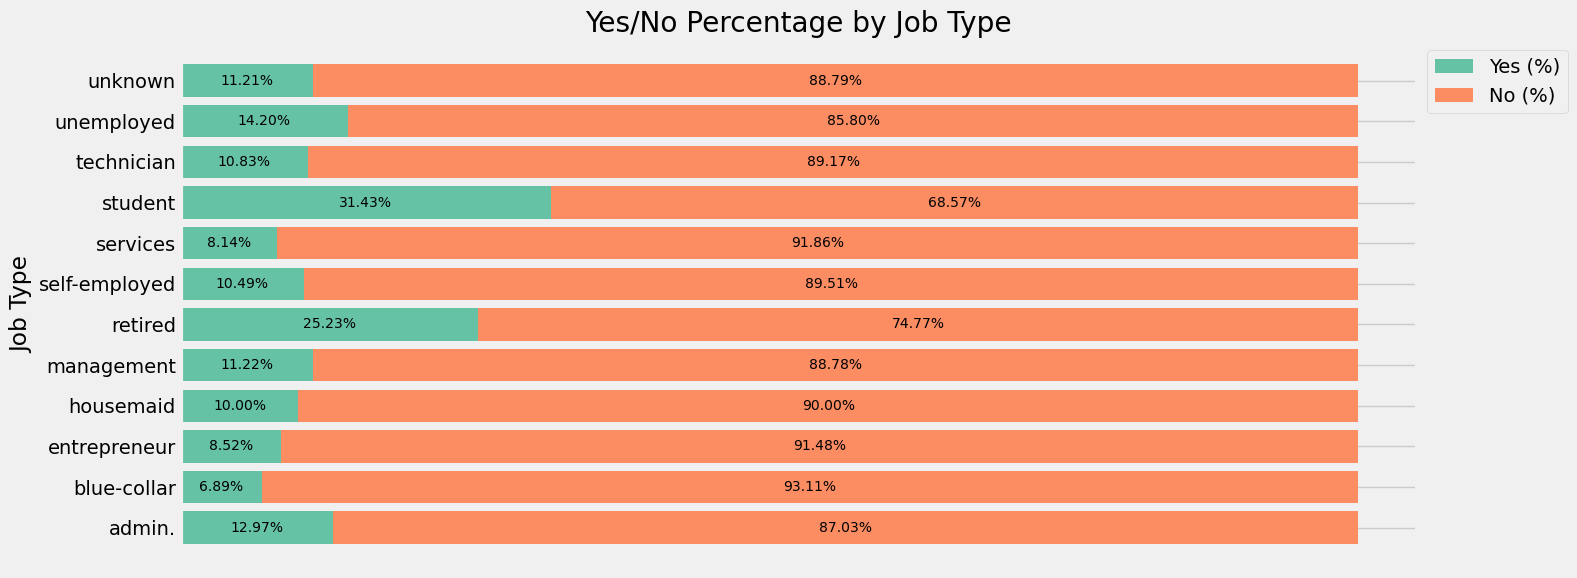

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Example DataFrame
# job_percentdurations = pd.DataFrame({...})

plt.figure(figsize=(16,6))

# Plot bars and capture the bar objects
bars_yes = plt.barh(job_percentages["Job Type"], job_percentages["Yes (%)"], label="Yes (%)")
bars_no = plt.barh(job_percentages["Job Type"], job_percentages["No (%)"],
                   left=job_percentages["Yes (%)"], label="No (%)")

# Add percentage labels inside the bars
for bar in bars_yes:
    width = bar.get_width()
    if width > 0: 
        plt.text(

        width/2,                   # center of the "Yes" segment
        bar.get_y() + bar.get_height()/2,
        f"{width:.2f}%",
        ha='center', va='center',
        color='black', fontsize=10
    )

for bar, yes_width in zip(bars_no, job_percentages["Yes (%)"]):
        width = bar.get_width()
        if width > 0: 
            plt.text(
    
            yes_width + width/2,        # center of the "No" segment
            bar.get_y() + bar.get_height()/2,
            f"{width:.2f}%",
            ha='center', va='center',
            color='black', fontsize=10
        )


plt.ylabel("Job Type")
plt.title("Yes/No Percentage by Job Type")

# Set major ticks every 10%
plt.xticks([])


plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


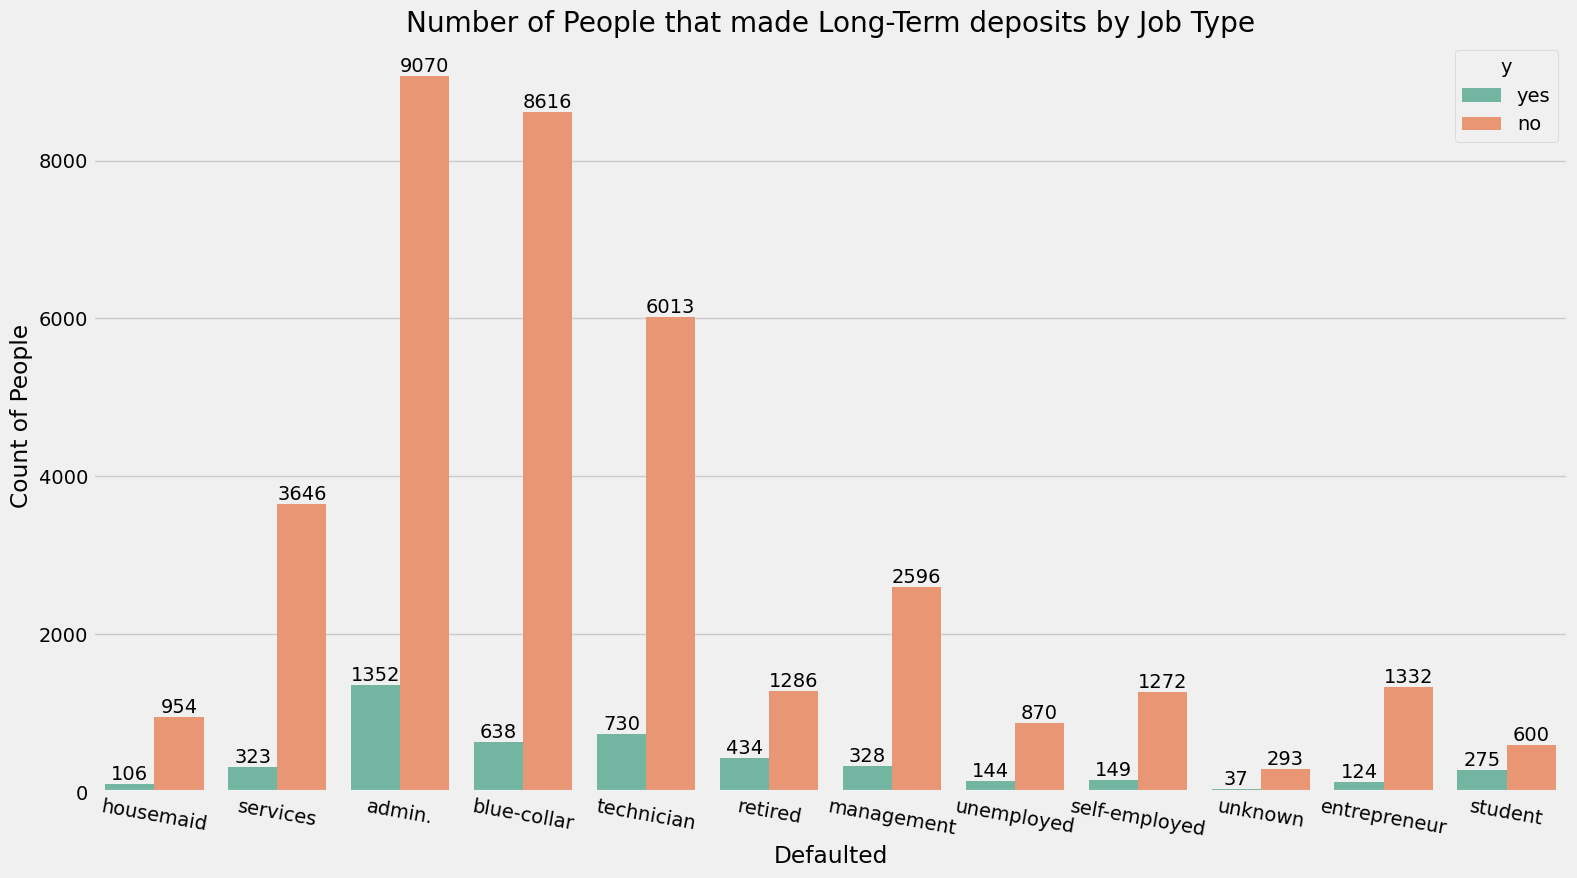

In [47]:
# Draw a barplot that counts the number of people who have made a long term deposit (y : yes or no) for each category of default (defaulted: yes , no , unkown)
fig, ax = plt.subplots( figsize = (16,9))
sns.countplot(data=bankDF, x="job", hue="y", ax=ax ,hue_order=[ "yes", "no"])
plt.title("Number of People that made Long-Term deposits by Job Type")
plt.xlabel("Defaulted")
plt.ylabel("Count of People")

# Add count labels on each bar
for container in ax.containers:
    ax.bar_label(container)

plt.xticks(rotation=-10, ha='center', position=(1.2, 0))
plt.tight_layout()

plt.show()

#### "marital" Property
Marital Status a person has.

##### **Key Insights**
- Unkown records are to be eliminated because they are so few (80)
-

In [48]:
marital_counts = bankDF.groupby(['marital', 'y']).size().unstack(fill_value=0)
marital_counts['total'] = marital_counts.sum(axis=1)
marital_counts['yes_ratio'] = marital_counts['yes'] / marital_counts['total']
marital_counts['no_ratio'] = marital_counts['no'] / marital_counts['total']

# Convert to percentages and round
#
marital_percentages = marital_counts[['yes_ratio', 'no_ratio']] * 100
marital_percentages = marital_percentages.round(2)
marital_percentages["total"] =  marital_counts["total"]

# Reset index so 'education' becomes a column
marital_percentages = marital_percentages.reset_index()

# Rename columns for clarity
marital_percentages = marital_percentages.rename(
    columns={
        'marital': 'Marital Status',
        'yes_ratio': 'Yes (%)',
        'no_ratio': 'No (%)',
        'total': 'Total People'
    }
)

marital_percentages.sort_values(by="Marital Status", ascending=True, inplace=True)
# Display the percentage table
print("Percentage of People that made Long-Term Deposits by Marital Status")
display(marital_percentages)

Percentage of People that made Long-Term Deposits by Marital Status


y,Marital Status,Yes (%),No (%),Total People
0,divorced,10.32,89.68,4612
1,married,10.16,89.84,24928
2,single,14.00,86.00,11568
3,unknown,15.00,85.00,80


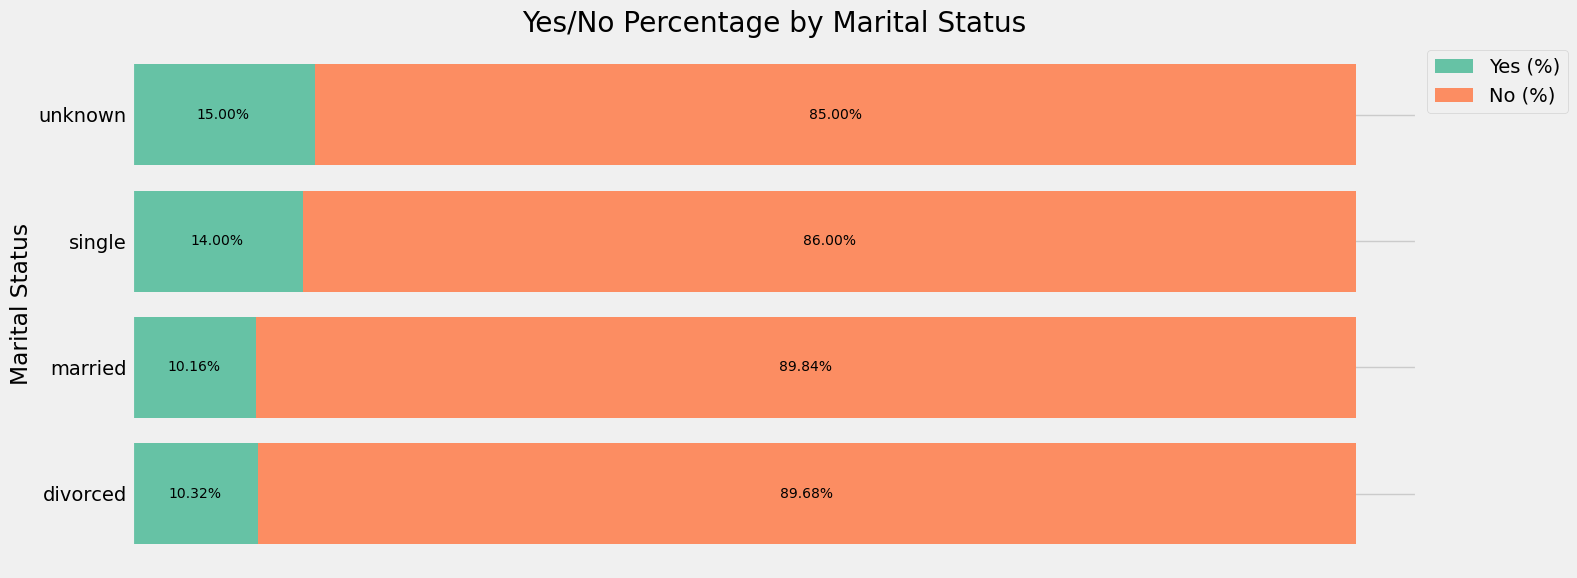

In [49]:
plt.figure(figsize=(16,6))

# Plot bars and capture the bar objects
bars_yes = plt.barh(marital_percentages["Marital Status"], marital_percentages["Yes (%)"], label="Yes (%)")
bars_no = plt.barh(marital_percentages["Marital Status"], marital_percentages["No (%)"],
                   left=marital_percentages["Yes (%)"], label="No (%)")

# Add percentage labels inside the bars
for bar in bars_yes:
    width = bar.get_width()
    if width > 0: 
        plt.text(

        width/2,                   # center of the "Yes" segment
        bar.get_y() + bar.get_height()/2,
        f"{width:.2f}%",
        ha='center', va='center',
        color='black', fontsize=10
    )

for bar, yes_width in zip(bars_no, marital_percentages["Yes (%)"]):
        width = bar.get_width()
        if width > 0: 
            plt.text(
    
            yes_width + width/2,        # center of the "No" segment
            bar.get_y() + bar.get_height()/2,
            f"{width:.2f}%",
            ha='center', va='center',
            color='black', fontsize=10
        )


plt.ylabel("Marital Status")
plt.title("Yes/No Percentage by Marital Status")

# Set major ticks every 10%
plt.xticks([])


plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


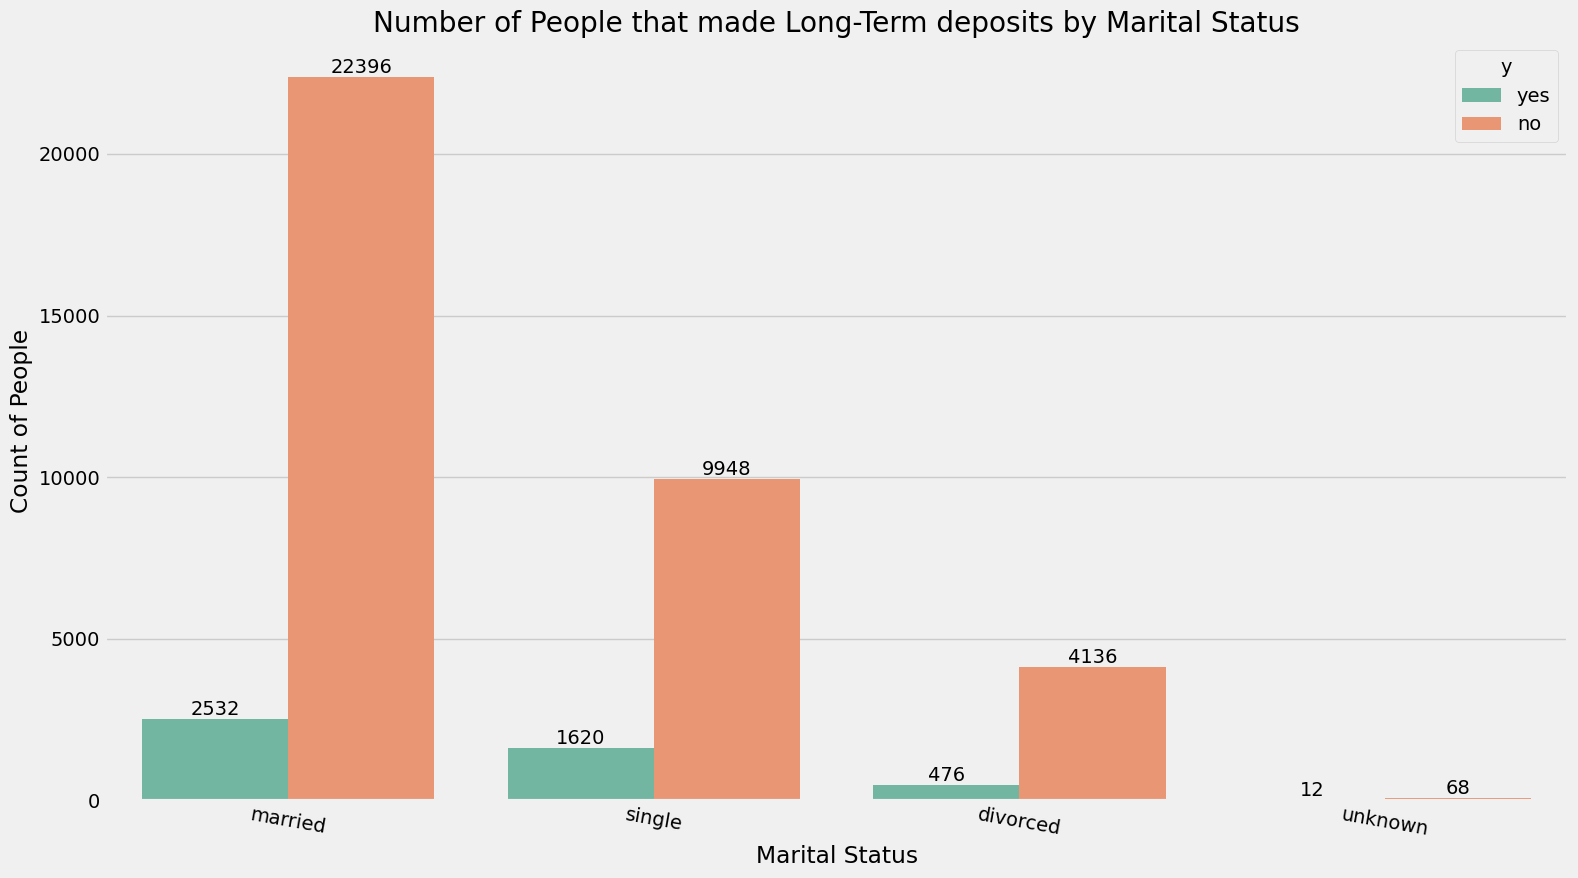

In [50]:
# Draw a barplot that counts the number of people who have made a long term deposit (y : yes or no) for each category of default (defaulted: yes , no , unkown)
fig, ax = plt.subplots( figsize = (16,9))
sns.countplot(data=bankDF, x="marital", hue="y", ax=ax ,hue_order=[ "yes", "no"])
plt.title("Number of People that made Long-Term deposits by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count of People")

# Add count labels on each bar
for container in ax.containers:
    ax.bar_label(container)

plt.xticks(rotation=-10, ha='center', position=(1.2, 0))
plt.tight_layout()

plt.show()

#### "education" Property
Education level a person has.

##### **Key Insights**
- 
-

In [51]:
education_counts = bankDF.groupby(['education', 'y']).size().unstack(fill_value=0)
education_counts['total'] = education_counts.sum(axis=1)
education_counts['yes_ratio'] = education_counts['yes'] / education_counts['total']
education_counts['no_ratio'] = education_counts['no'] / education_counts['total']

# Convert to percentages and round
#
education_percentages = education_counts[['yes_ratio', 'no_ratio']] * 100
education_percentages = education_percentages.round(2)
education_percentages["total"] =  education_counts["total"]

# Reset index so 'education' becomes a column
education_percentages = education_percentages.reset_index()

# Rename columns for clarity
education_percentages = education_percentages.rename(
    columns={
        'education': 'Education',
        'yes_ratio': 'Yes (%)',
        'no_ratio': 'No (%)',
        'total': 'Total People'
    }
)

education_percentages.sort_values(by="Education", ascending=True, inplace=True)
# Display the percentage table
print("Percentage of People that made Long-Term Deposits by Education")
display(education_percentages)

Percentage of People that made Long-Term Deposits by Education


y,Education,Yes (%),No (%),Total People
0,basic.4y,10.25,89.75,4176
1,basic.6y,8.20,91.80,2292
2,basic.9y,7.82,92.18,6045
3,high.school,10.84,89.16,9515
4,illiterate,22.22,77.78,18
5,professional.course,11.35,88.65,5243
6,university.degree,13.72,86.28,12168
7,unknown,14.50,85.50,1731


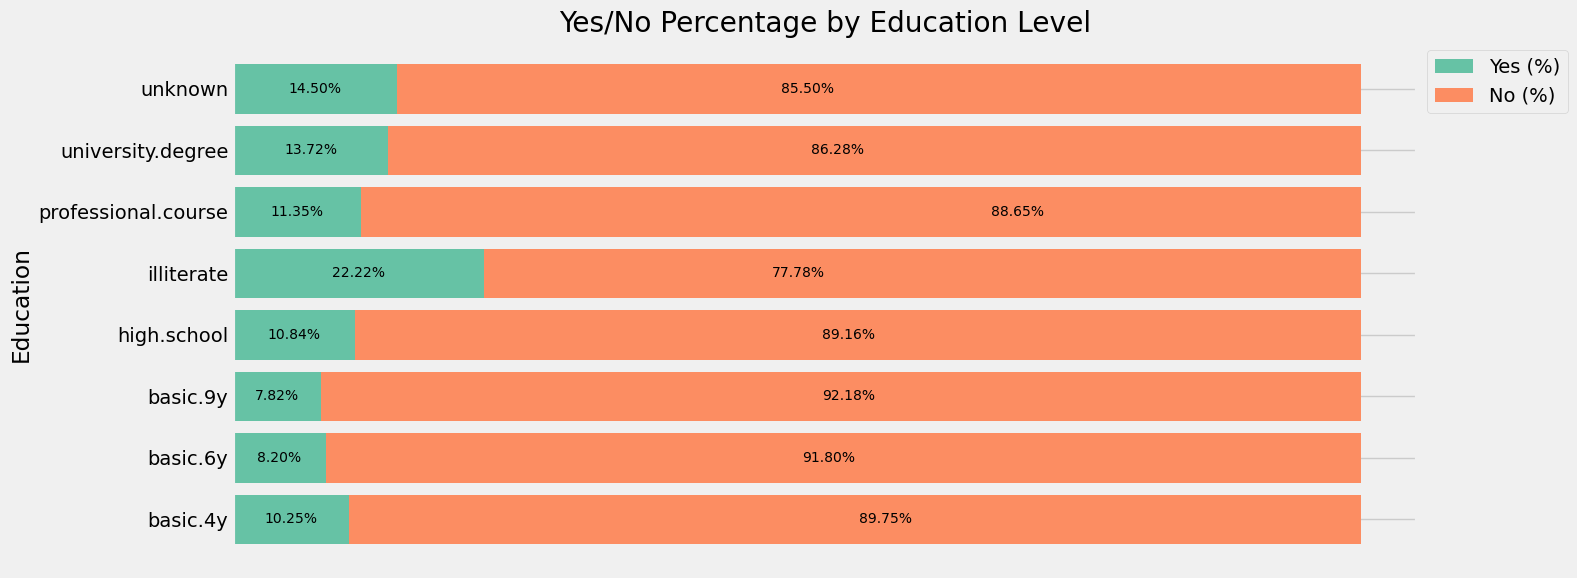

In [52]:
plt.figure(figsize=(16,6))

# Plot bars and capture the bar objects
bars_yes = plt.barh(education_percentages["Education"], education_percentages["Yes (%)"], label="Yes (%)")
bars_no = plt.barh(education_percentages["Education"], education_percentages["No (%)"],
                   left=education_percentages["Yes (%)"], label="No (%)")

# Add percentage labels inside the bars
for bar in bars_yes:
    width = bar.get_width()
    if width > 0: 
        plt.text(
        width/2,                   # center of the "Yes" segment
        bar.get_y() + bar.get_height()/2,
        f"{width:.2f}%",
        ha='center', va='center',
        color='black', fontsize=10
    )

for bar, yes_width in zip(bars_no, job_percentages["Yes (%)"]):
    width = bar.get_width()
    if width > 0: 
        plt.text(
        yes_width + width/2,        # center of the "No" segment
        bar.get_y() + bar.get_height()/2,
        f"{width:.2f}%",
        ha='center', va='center',
        color='black', fontsize=10
    )


plt.ylabel("Education")
plt.title("Yes/No Percentage by Education Level")

# Remove Ticks
plt.xticks([])


plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


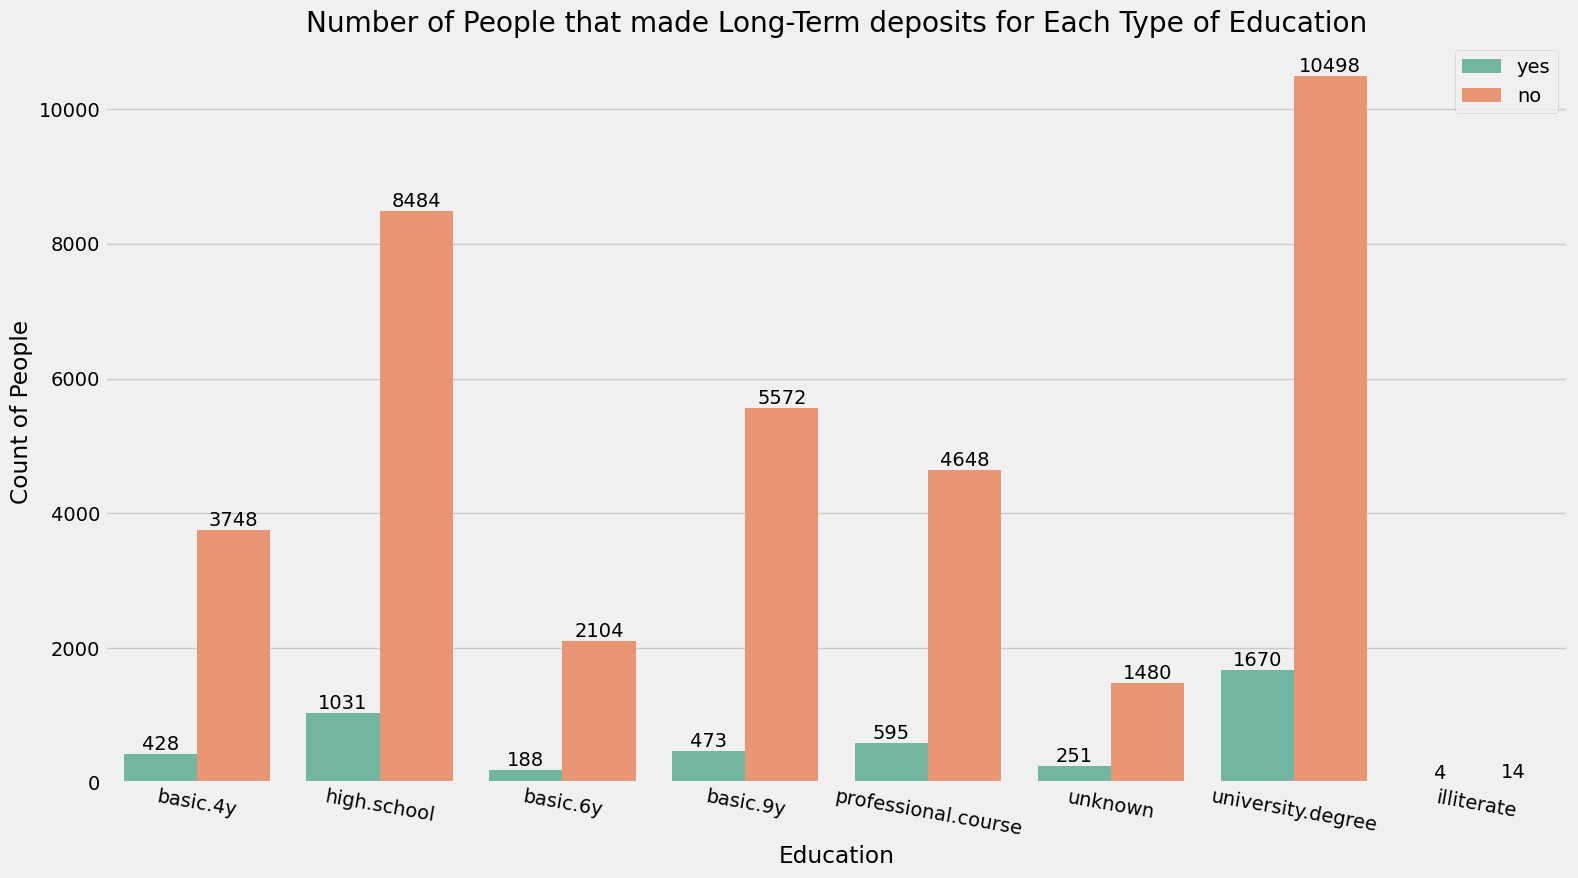

In [53]:
# Draw a barplot that counts the number of people who have made a long term deposit (y : yes or no) for each category of default (defaulted: yes , no , unkown)
fig, ax = plt.subplots( figsize = (16,9))
sns.countplot(data=bankDF, x="education", hue="y", ax=ax ,hue_order=["yes", "no"])
plt.title("Number of People that made Long-Term deposits for Each Type of Education")
plt.xlabel("Education")
plt.ylabel("Count of People")

# Add count labels on each bar
for container in ax.containers:
    ax.bar_label(container)

plt.xticks(rotation=-10, ha='center', position=(1.2, 0))
plt.tight_layout()
plt.legend()
plt.show()

In [54]:
# Remove illeterate
PreppedDF = PreppedDF[PreppedDF['education'] != "illiterate"]

In [55]:
def reassign_category_keeping_class_balance(dataFrame : pd.DataFrame , column : str, unwanted : str) -> pd.Series:
    # Filter the wanted properties
    wantedEntries = dataFrame[dataFrame[column] != unwanted]

    # Count the presence of them
    categoryCount = wantedEntries.groupby(column).count()

    # Calculate





#### "default" Property

If a person has defaulted on a credit.

As seen in the graph below, the "default" property shows a severe class imbalance with very few reliable entries for "yes" (customers who have credit in default). The overwhelming majority of observations are labeled "no", followed by "unknown" and with only a minimal number of "yes".

Given this extreme imbalance, the "default" property lacks sufficient positive cases to provide meaningful predictive power for the model. Including such an imbalanced feature could introduce bias and noise rather than useful information. Therefore, we will not consider this property for the model.


In [56]:
default_counts = bankDF.groupby(['housing', 'y']).size().unstack(fill_value=0)
default_counts['total'] = default_counts.sum(axis=1)
default_counts['yes_ratio'] = default_counts['yes'] / default_counts['total']
default_counts['no_ratio'] = default_counts['no'] / default_counts['total']

# Convert to percentages and round
#
default_percentages = default_counts[['yes_ratio', 'no_ratio']] * 100
default_percentages = default_percentages.round(2)
default_percentages["total"] =  default_counts["total"]

# Reset index so 'education' becomes a column
default_percentages = default_percentages.reset_index()

# Rename columns for clarity
default_percentages = default_percentages.rename(
    columns={
        'housing': 'Housing',
        'yes_ratio': 'Yes (%)',
        'no_ratio': 'No (%)',
        'total': 'Total People'
    }
)

default_percentages.sort_values(by="Housing", ascending=True, inplace=True)
# Display the percentage table
print("Percentage of People that made Long-Term Deposits by Default Status")
display(default_percentages)

Percentage of People that made Long-Term Deposits by Default Status


y,Housing,Yes (%),No (%),Total People
0,no,10.88,89.12,18622
1,unknown,10.81,89.19,990
2,yes,11.62,88.38,21576


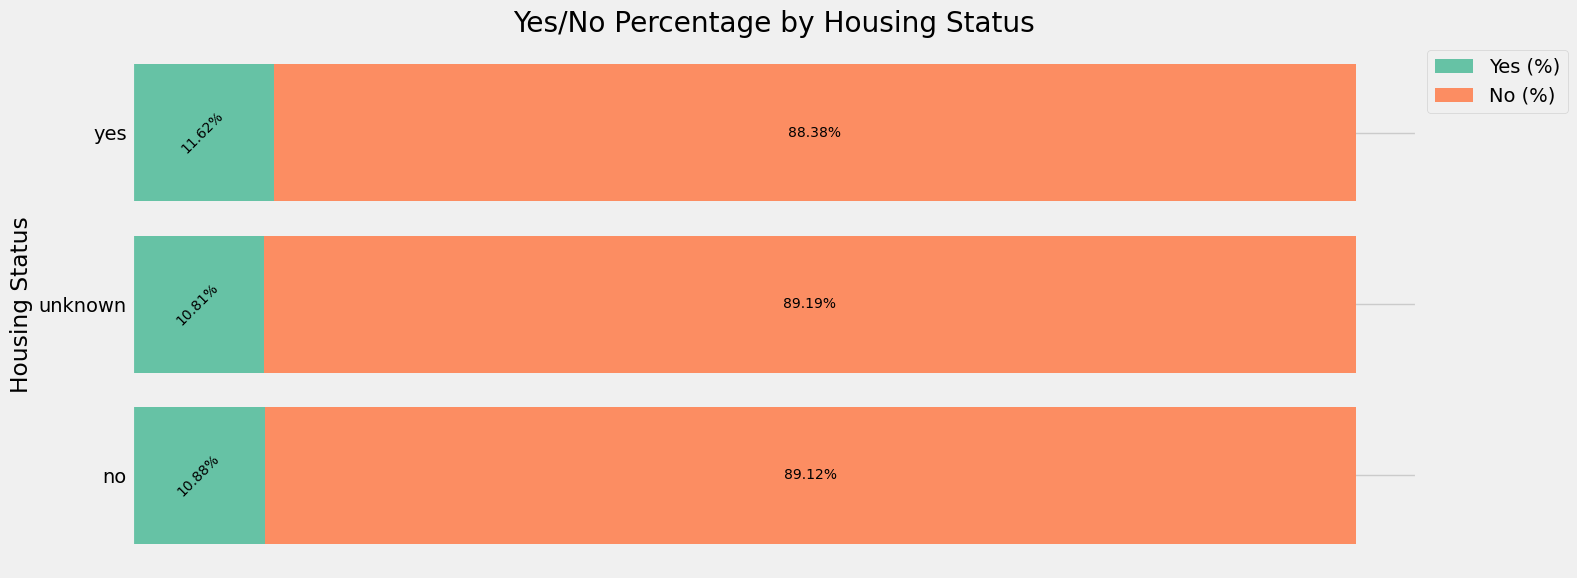

In [57]:
plt.figure(figsize=(16,6))

# Plot bars and capture the bar objects
bars_yes = plt.barh(default_percentages["Housing"], default_percentages["Yes (%)"], label="Yes (%)")
bars_no = plt.barh(default_percentages["Housing"], default_percentages["No (%)"],
                   left=default_percentages["Yes (%)"], label="No (%)")

# Add percentage labels inside the bars
for bar in bars_yes:
    width = bar.get_width()
    if width > 0: 
        plt.text(
        width/2,                   # center of the "Yes" segment
        bar.get_y() + bar.get_height()/2,
        f"{width:.2f}%",
        ha='center', va='center', rotation= 45,
        color='black', fontsize=10
    )

for bar, yes_width in zip(bars_no, default_percentages["Yes (%)"]):
    width = bar.get_width()
    if width > 0: 
        plt.text(
        yes_width + width/2,        # center of the "No" segment
        bar.get_y() + bar.get_height()/2,
        f"{width:.2f}%",
        ha='center', va='center',
        color='black', fontsize=10
    )


plt.ylabel("Housing Status")
plt.title("Yes/No Percentage by Housing Status")

# Remove Ticks
plt.xticks([])


plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


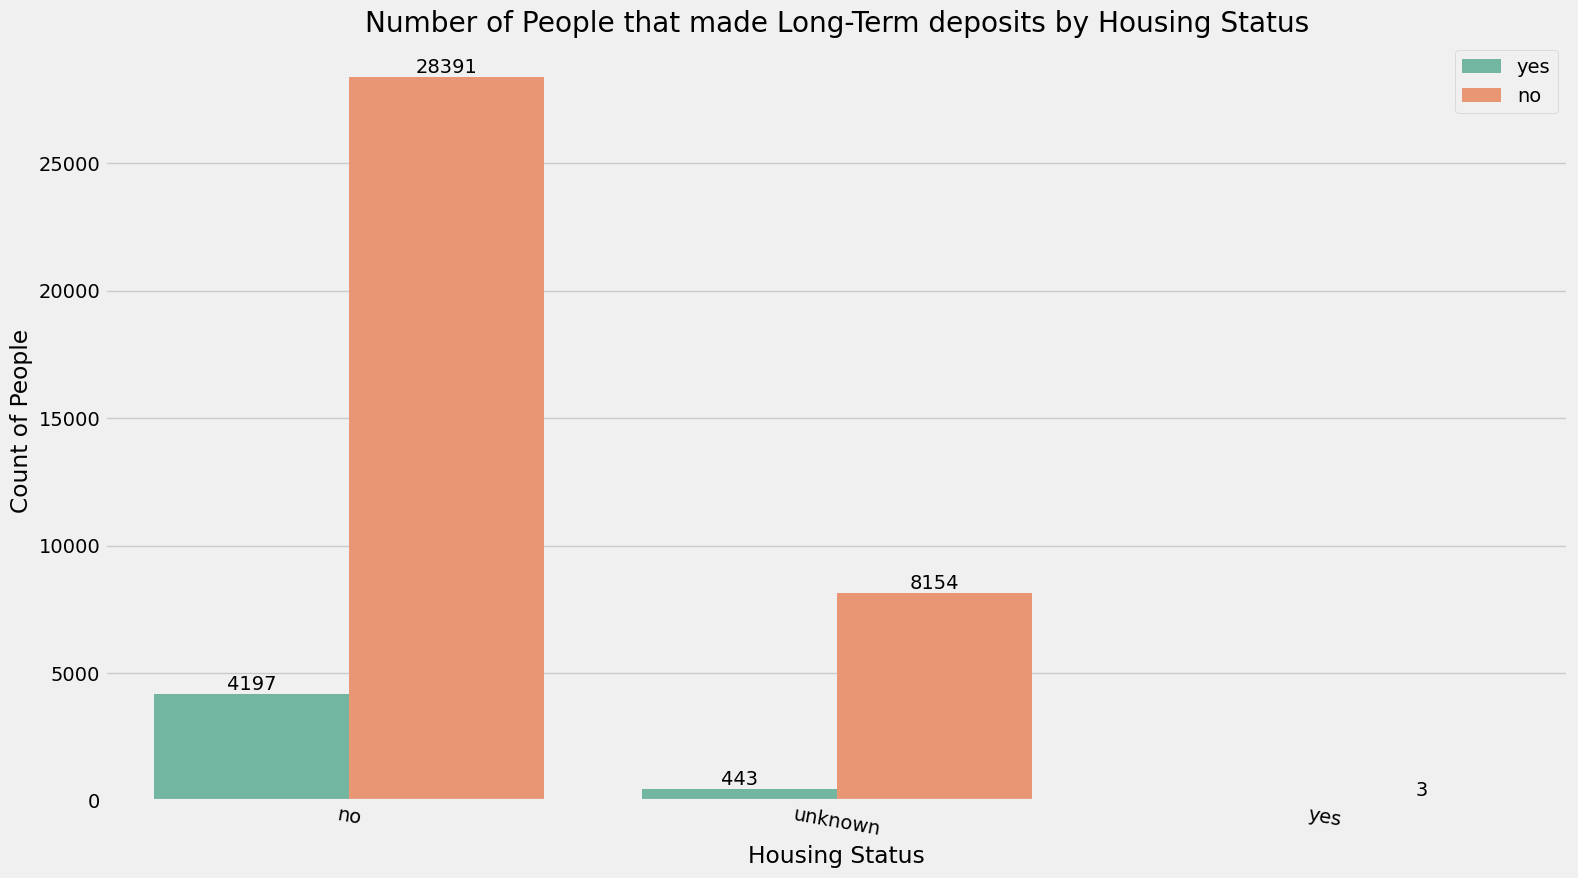

In [58]:
# Draw a barplot that counts the number of people who have made a long term deposit (y : yes or no) for each category of default (defaulted: yes , no , unkown)
fig, ax = plt.subplots( figsize = (16,9))
sns.countplot(data=bankDF, x="default", hue="y", ax=ax ,hue_order=[ "yes", "no"])
plt.title("Number of People that made Long-Term deposits by Housing Status")
plt.xlabel("Housing Status")
plt.ylabel("Count of People")

# Add count labels on each bar
for container in ax.containers:
    ax.bar_label(container)

plt.xticks(rotation=-10, ha='center', position=(1.2, 0))
plt.tight_layout()
plt.legend()
plt.show()

#### "housing" Property

If a person has housing.

In [59]:
housing_counts = bankDF.groupby(['housing', 'y']).size().unstack(fill_value=0)
housing_counts['total'] = housing_counts.sum(axis=1)
housing_counts['yes_ratio'] = housing_counts['yes'] / housing_counts['total']
housing_counts['no_ratio'] = housing_counts['no'] / housing_counts['total']

# Convert to percentages and round
#
housing_percentages = housing_counts[['yes_ratio', 'no_ratio']] * 100
housing_percentages = housing_percentages.round(2)
housing_percentages["total"] =  housing_counts["total"]

# Reset index so 'education' becomes a column
housing_percentages = housing_percentages.reset_index()

# Rename columns for clarity
housing_percentages = housing_percentages.rename(
    columns={
        'housing': 'Housing',
        'yes_ratio': 'Yes (%)',
        'no_ratio': 'No (%)',
        'total': 'Total People'
    }
)

housing_percentages.sort_values(by="Housing", ascending=True, inplace=True)
# Display the percentage table
print("Percentage of People that made Long-Term Deposits by Default Status")
display(housing_percentages)

Percentage of People that made Long-Term Deposits by Default Status


y,Housing,Yes (%),No (%),Total People
0,no,10.88,89.12,18622
1,unknown,10.81,89.19,990
2,yes,11.62,88.38,21576


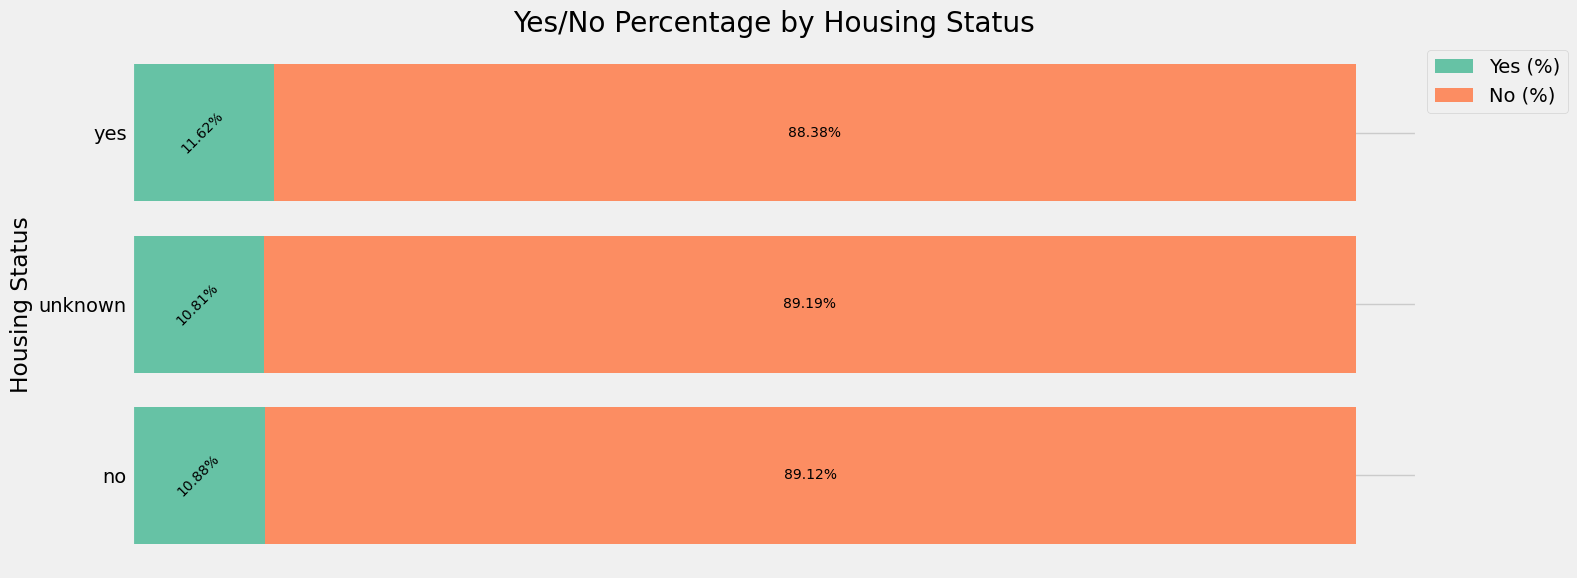

In [60]:
plt.figure(figsize=(16,6))

# Plot bars and capture the bar objects
bars_yes = plt.barh(housing_percentages["Housing"], housing_percentages["Yes (%)"], label="Yes (%)")
bars_no = plt.barh(housing_percentages["Housing"], housing_percentages["No (%)"],
                   left=housing_percentages["Yes (%)"], label="No (%)")

# Add percentage labels inside the bars
for bar in bars_yes:
    width = bar.get_width()
    if width > 0: 
        plt.text(
        width/2,                   # center of the "Yes" segment
        bar.get_y() + bar.get_height()/2,
        f"{width:.2f}%",
        ha='center', va='center', rotation= 45,
        color='black', fontsize=10
    )

for bar, yes_width in zip(bars_no, housing_percentages["Yes (%)"]):
    width = bar.get_width()
    if width > 0: 
        plt.text(
        yes_width + width/2,        # center of the "No" segment
        bar.get_y() + bar.get_height()/2,
        f"{width:.2f}%",
        ha='center', va='center',
        color='black', fontsize=10
    )


plt.ylabel("Housing Status")
plt.title("Yes/No Percentage by Housing Status")

# Remove Ticks
plt.xticks([])


plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


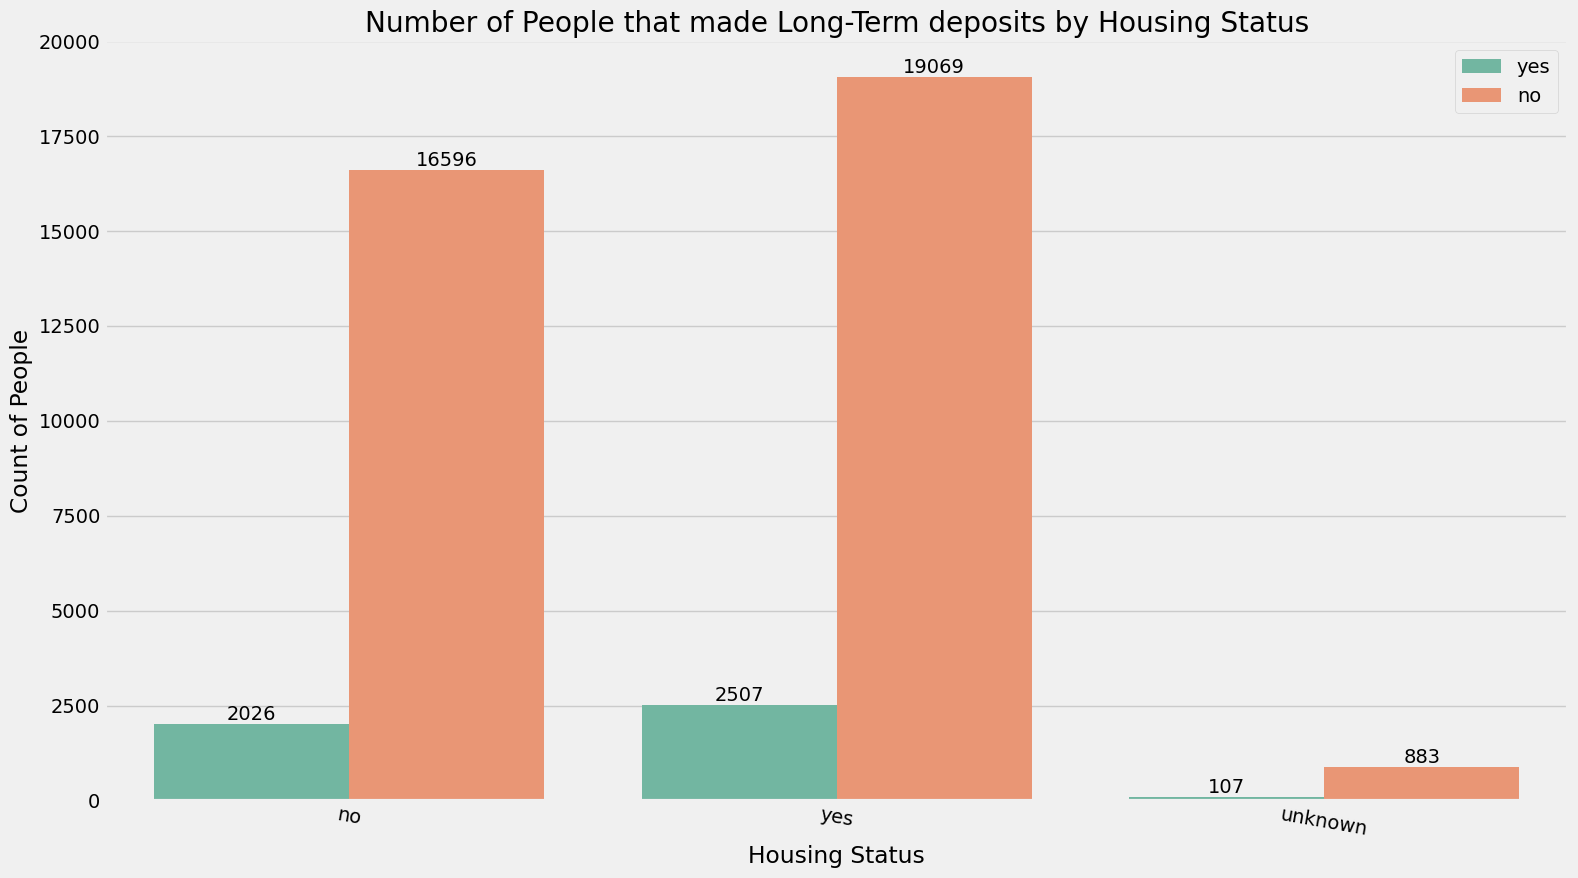

In [61]:
# Draw a barplot that counts the number of people who have made a long term deposit (y : yes or no) for each category of default (defaulted: yes , no , unkown)
fig, ax = plt.subplots( figsize = (16,9))
sns.countplot(data=bankDF, x="housing", hue="y", ax=ax ,hue_order=[ "yes", "no"])
plt.title("Number of People that made Long-Term deposits by Housing Status")
plt.xlabel("Housing Status")
plt.ylabel("Count of People")

# Add count labels on each bar
for container in ax.containers:
    ax.bar_label(container)

plt.xticks(rotation=-10, ha='center', position=(1.2, 0))
plt.tight_layout()
plt.legend()
plt.show()

In [62]:
# Dropping "Default"
PreppedDF.drop(columns=["default"], inplace=True)

#### "loan" Property

In [63]:
loan_counts = bankDF.groupby(['loan', 'y']).size().unstack(fill_value=0)
loan_counts['total'] = loan_counts.sum(axis=1)
loan_counts['yes_ratio'] = loan_counts['yes'] / loan_counts['total']
loan_counts['no_ratio'] = loan_counts['no'] / loan_counts['total']

# Convert to percentages and round
loan_percentages = loan_counts[['yes_ratio', 'no_ratio']] * 100
loan_percentages = loan_percentages.round(2)
loan_percentages["total"] = loan_counts["total"]

# Reset index so 'loan' becomes a column
loan_percentages = loan_percentages.reset_index()

# Rename columns for clarity
loan_percentages = loan_percentages.rename(
    columns={
        'loan': 'Loan',
        'yes_ratio': 'Yes (%)',
        'no_ratio': 'No (%)',
        'total': 'Total People'
    }
)

loan_percentages.sort_values(by="Loan", ascending=True, inplace=True)
# Display the percentage table
print("Percentage of People that made Long-Term Deposits by Loan Status")
display(loan_percentages)

Percentage of People that made Long-Term Deposits by Loan Status


y,Loan,Yes (%),No (%),Total People
0,no,11.34,88.66,33950
1,unknown,10.81,89.19,990
2,yes,10.93,89.07,6248


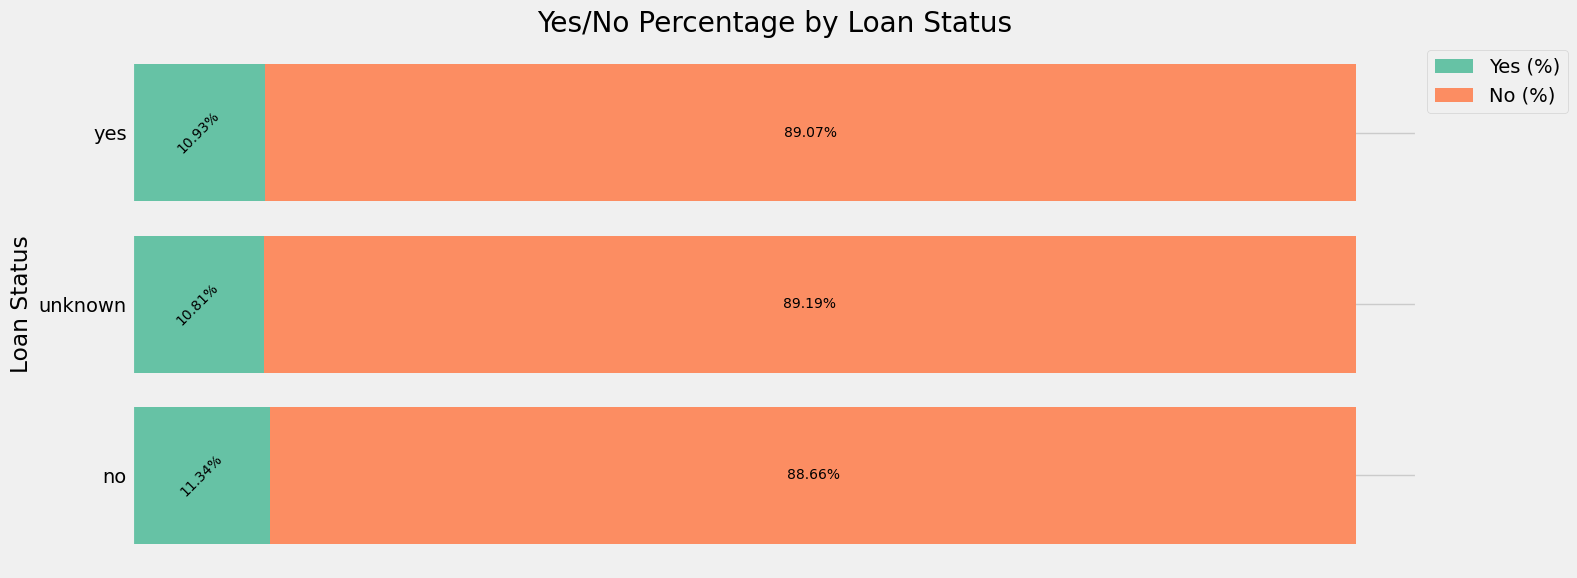

In [64]:
plt.figure(figsize=(16,6))

# Plot bars and capture the bar objects
bars_yes = plt.barh(loan_percentages["Loan"], loan_percentages["Yes (%)"], label="Yes (%)")
bars_no = plt.barh(loan_percentages["Loan"], loan_percentages["No (%)"],
                   left=loan_percentages["Yes (%)"], label="No (%)")

# Add percentage labels inside the bars
for bar in bars_yes:
    width = bar.get_width()
    if width > 0: 
        plt.text(
            width/2,                   # center of the "Yes" segment
            bar.get_y() + bar.get_height()/2,
            f"{width:.2f}%",
            ha='center', va='center', rotation=45,
            color='black', fontsize=10
        )

for bar, yes_width in zip(bars_no, loan_percentages["Yes (%)"]):
    width = bar.get_width()
    if width > 0: 
        plt.text(
            yes_width + width/2,        # center of the "No" segment
            bar.get_y() + bar.get_height()/2,
            f"{width:.2f}%",
            ha='center', va='center',
            color='black', fontsize=10
        )

plt.ylabel("Loan Status")
plt.title("Yes/No Percentage by Loan Status")

# Remove Ticks
plt.xticks([])

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

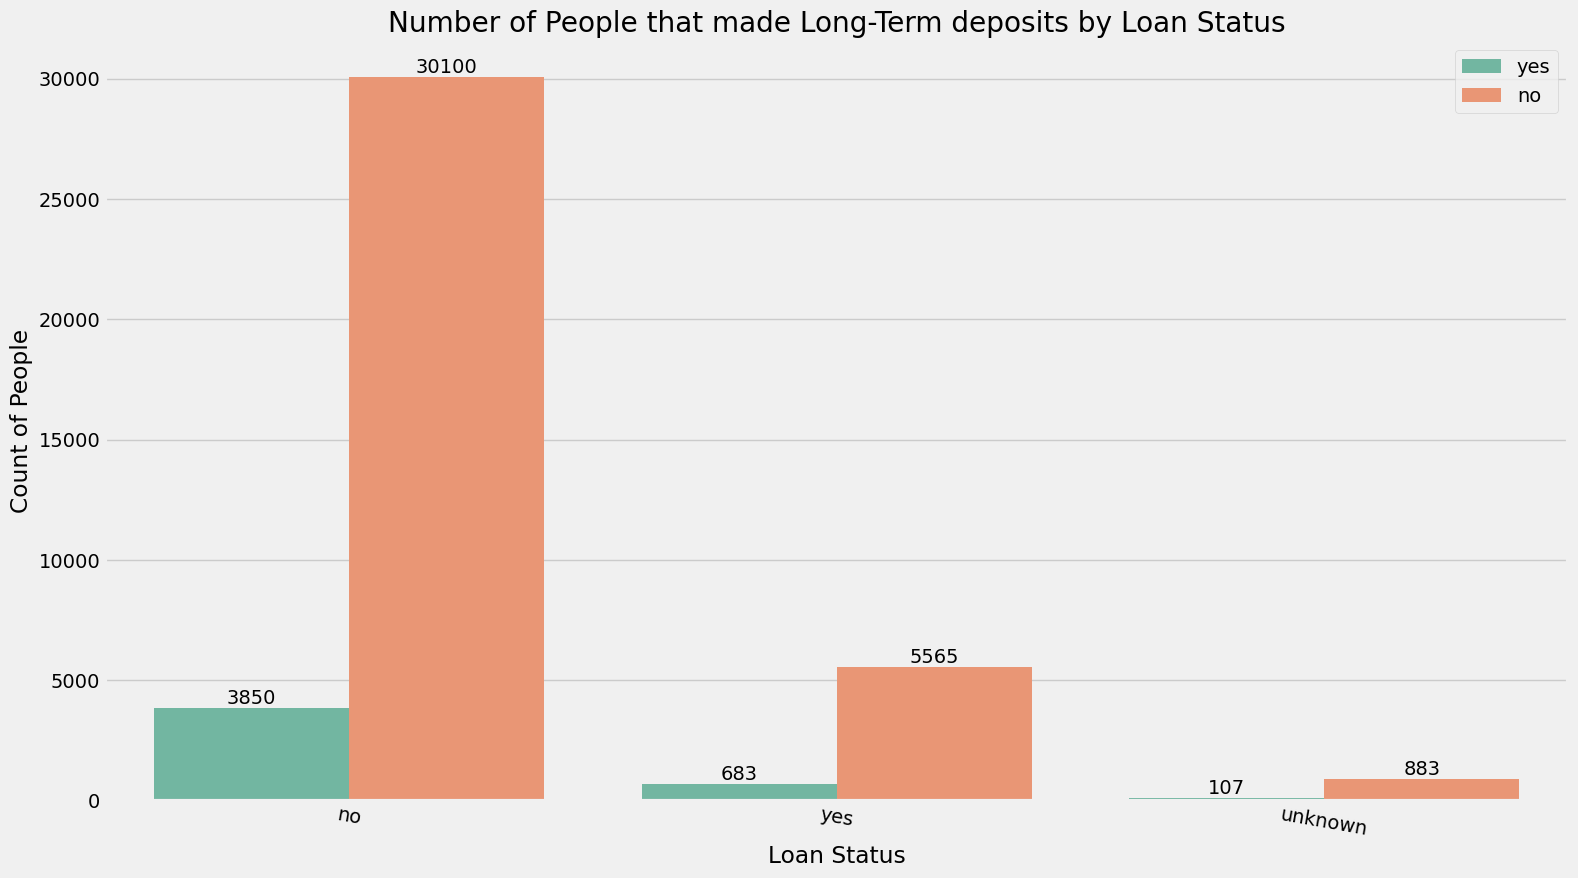

In [65]:
# Draw a barplot that counts the number of people who have made a long term deposit (y : yes or no) for each category of loan (loan: yes, no, unknown)
fig, ax = plt.subplots(figsize=(16,9))
sns.countplot(data=bankDF, x="loan", hue="y", ax=ax, hue_order=["yes", "no"])
plt.title("Number of People that made Long-Term deposits by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Count of People")

# Add count labels on each bar
for container in ax.containers:
    ax.bar_label(container)

plt.xticks(rotation=-10, ha='center', position=(1.2, 0))
plt.tight_layout()
plt.legend()
plt.show()

#### "Contact" Property

In [66]:
# 1. Calculate contact_percentages DataFrame
contact_counts = bankDF.groupby(['contact', 'y']).size().unstack(fill_value=0)
contact_counts['total'] = contact_counts.sum(axis=1)
contact_counts['yes_ratio'] = contact_counts['yes'] / contact_counts['total']
contact_counts['no_ratio'] = contact_counts['no'] / contact_counts['total']

# Convert to percentages and round
contact_percentages = contact_counts[['yes_ratio', 'no_ratio']] * 100
contact_percentages = contact_percentages.round(2)
contact_percentages["total"] = contact_counts["total"]

# Reset index so 'contact' becomes a column
contact_percentages = contact_percentages.reset_index()

# Rename columns for clarity
contact_percentages = contact_percentages.rename(
    columns={
        'contact': 'Contact',
        'yes_ratio': 'Yes (%)',
        'no_ratio': 'No (%)',
        'total': 'Total People'
    }
)

contact_percentages.sort_values(by="Contact", ascending=True, inplace=True)
print("Percentage of People that made Long-Term Deposits by Contact Type")
display(contact_percentages)

Percentage of People that made Long-Term Deposits by Contact Type


y,Contact,Yes (%),No (%),Total People
0,cellular,14.74,85.26,26144
1,telephone,5.23,94.77,15044


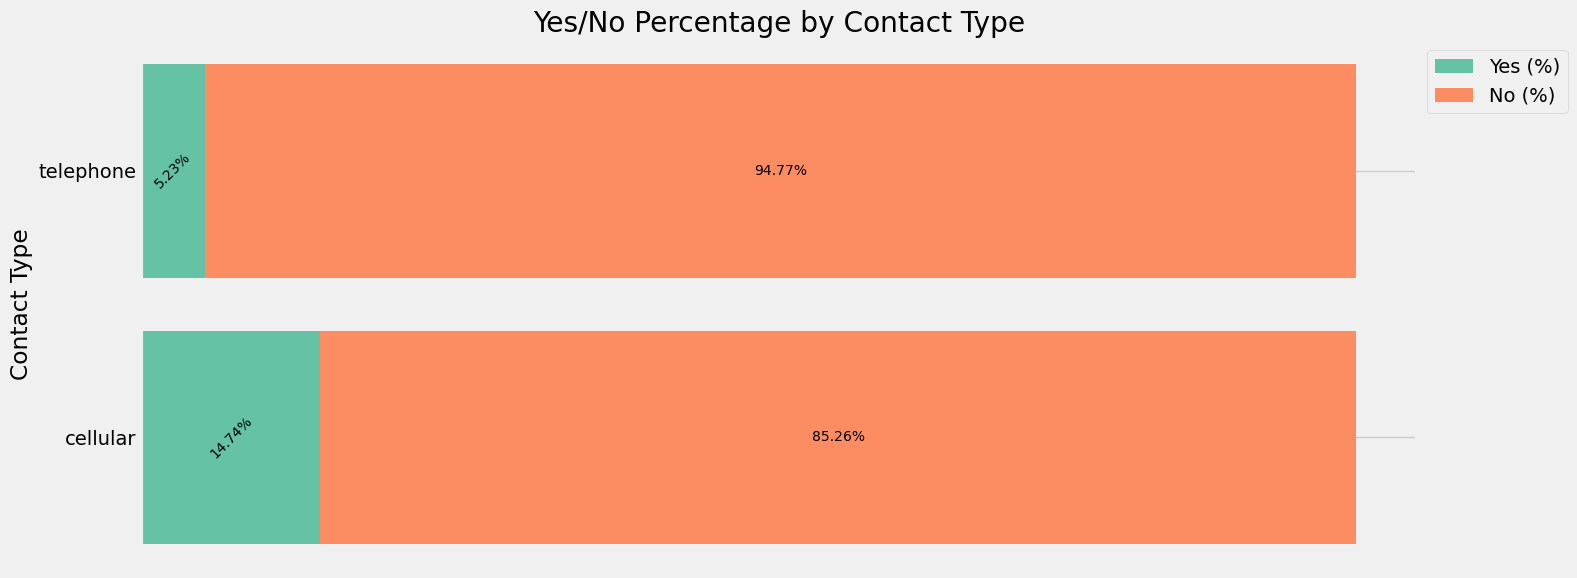

In [67]:
# 2. Horizontal stacked bar plot for Contact property
plt.figure(figsize=(16,6))

bars_yes = plt.barh(contact_percentages["Contact"], contact_percentages["Yes (%)"], label="Yes (%)")
bars_no = plt.barh(contact_percentages["Contact"], contact_percentages["No (%)"],
                   left=contact_percentages["Yes (%)"], label="No (%)")

for bar in bars_yes:
    width = bar.get_width()
    if width > 0: 
        plt.text(
            width/2,
            bar.get_y() + bar.get_height()/2,
            f"{width:.2f}%",
            ha='center', va='center', rotation=45,
            color='black', fontsize=10
        )

for bar, yes_width in zip(bars_no, contact_percentages["Yes (%)"]):
    width = bar.get_width()
    if width > 0: 
        plt.text(
            yes_width + width/2,
            bar.get_y() + bar.get_height()/2,
            f"{width:.2f}%",
            ha='center', va='center',
            color='black', fontsize=10
        )

plt.ylabel("Contact Type")
plt.title("Yes/No Percentage by Contact Type")
plt.xticks([])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

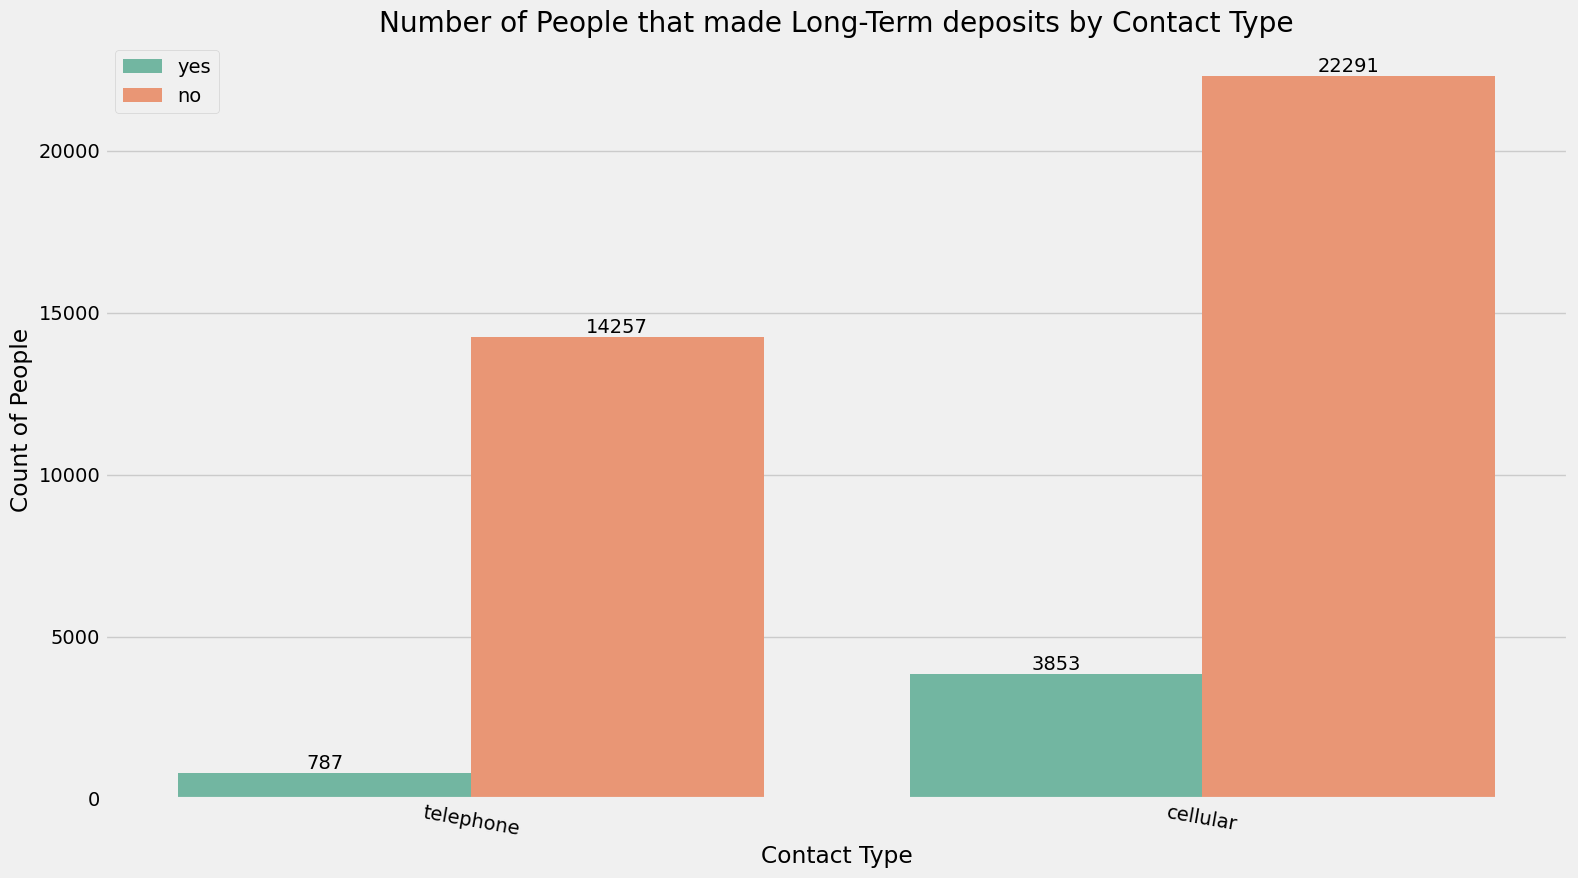

In [68]:
# 3. Countplot for Contact property
fig, ax = plt.subplots(figsize=(16,9))
sns.countplot(data=bankDF, x="contact", hue="y", ax=ax, hue_order=["yes", "no"])
plt.title("Number of People that made Long-Term deposits by Contact Type")
plt.xlabel("Contact Type")
plt.ylabel("Count of People")

for container in ax.containers:
    ax.bar_label(container)

plt.xticks(rotation=-10, ha='center', position=(1.2, 0))
plt.tight_layout()
plt.legend()
plt.show()

#### "Month" Property

In [69]:
# 1. Calculate month_percentages DataFrame (ordered Jan-Dec)
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

month_counts = bankDF.groupby(['month', 'y']).size().unstack(fill_value=0)
month_counts['total'] = month_counts.sum(axis=1)
month_counts['yes_ratio'] = month_counts['yes'] / month_counts['total']
month_counts['no_ratio'] = month_counts['no'] / month_counts['total']

# Convert to percentages and round
month_percentages = month_counts[['yes_ratio', 'no_ratio']] * 100
month_percentages = month_percentages.round(2)
month_percentages["total"] = month_counts["total"]

# Reset index so 'month' becomes a column
month_percentages = month_percentages.reset_index()

# Rename columns for clarity
month_percentages = month_percentages.rename(
    columns={
        'month': 'Month',
        'yes_ratio': 'Yes (%)',
        'no_ratio': 'No (%)',
        'total': 'Total People'
    }
)

# Sort by month order
month_percentages['Month'] = pd.Categorical(month_percentages['Month'], categories=month_order, ordered=True)
month_percentages.sort_values(by="Month", inplace=True)

print("Percentage of People that made Long-Term Deposits by Month")
display(month_percentages)

Percentage of People that made Long-Term Deposits by Month


y,Month,Yes (%),No (%),Total People
5,mar,50.55,49.45,546
0,apr,20.48,79.52,2632
6,may,6.43,93.57,13769
4,jun,10.51,89.49,5318
3,jul,9.05,90.95,7174
1,aug,10.60,89.40,6178
9,sep,44.91,55.09,570
8,oct,43.87,56.13,718
7,nov,10.14,89.86,4101
2,dec,48.90,51.10,182


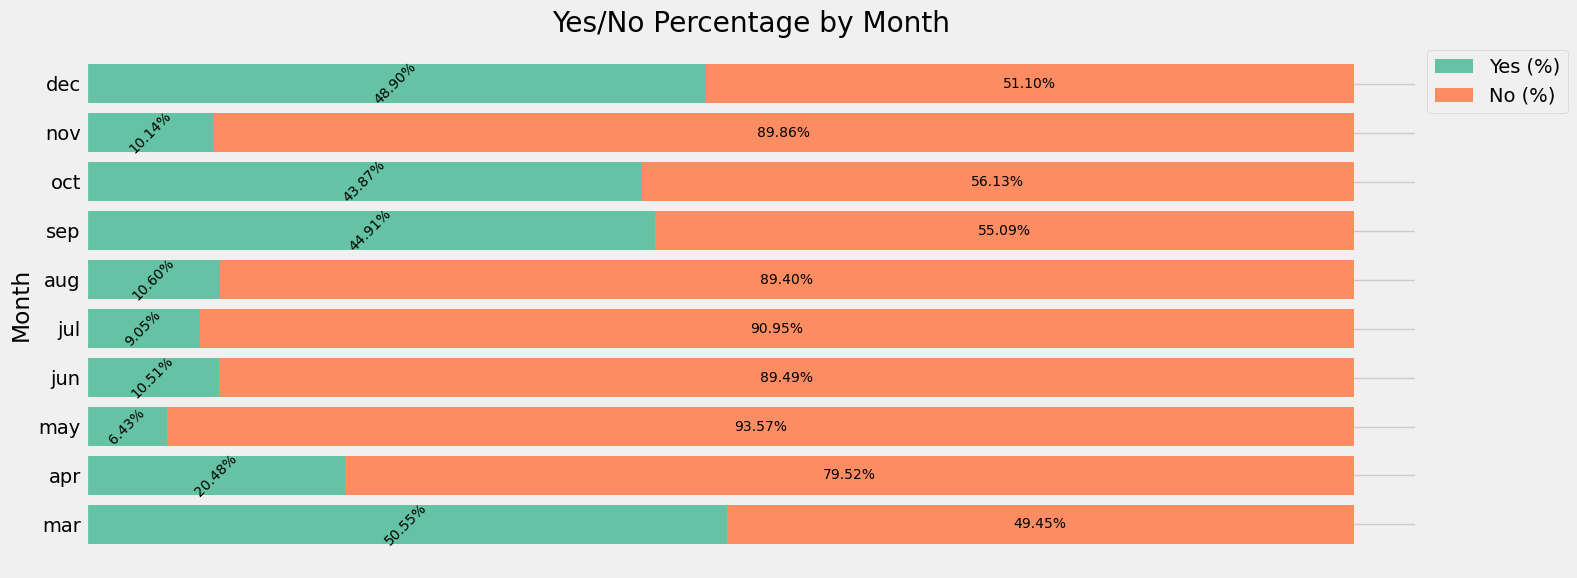

In [70]:
# 2. Horizontal stacked bar plot for Month property
plt.figure(figsize=(16,6))

bars_yes = plt.barh(month_percentages["Month"], month_percentages["Yes (%)"], label="Yes (%)")
bars_no = plt.barh(month_percentages["Month"], month_percentages["No (%)"],
                   left=month_percentages["Yes (%)"], label="No (%)")

for bar in bars_yes:
    width = bar.get_width()
    if width > 0: 
        plt.text(
            width/2,
            bar.get_y() + bar.get_height()/2,
            f"{width:.2f}%",
            ha='center', va='center', rotation=45,
            color='black', fontsize=10
        )

for bar, yes_width in zip(bars_no, month_percentages["Yes (%)"]):
    width = bar.get_width()
    if width > 0: 
        plt.text(
            yes_width + width/2,
            bar.get_y() + bar.get_height()/2,
            f"{width:.2f}%",
            ha='center', va='center',
            color='black', fontsize=10
        )

plt.ylabel("Month")
plt.title("Yes/No Percentage by Month")
plt.xticks([])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

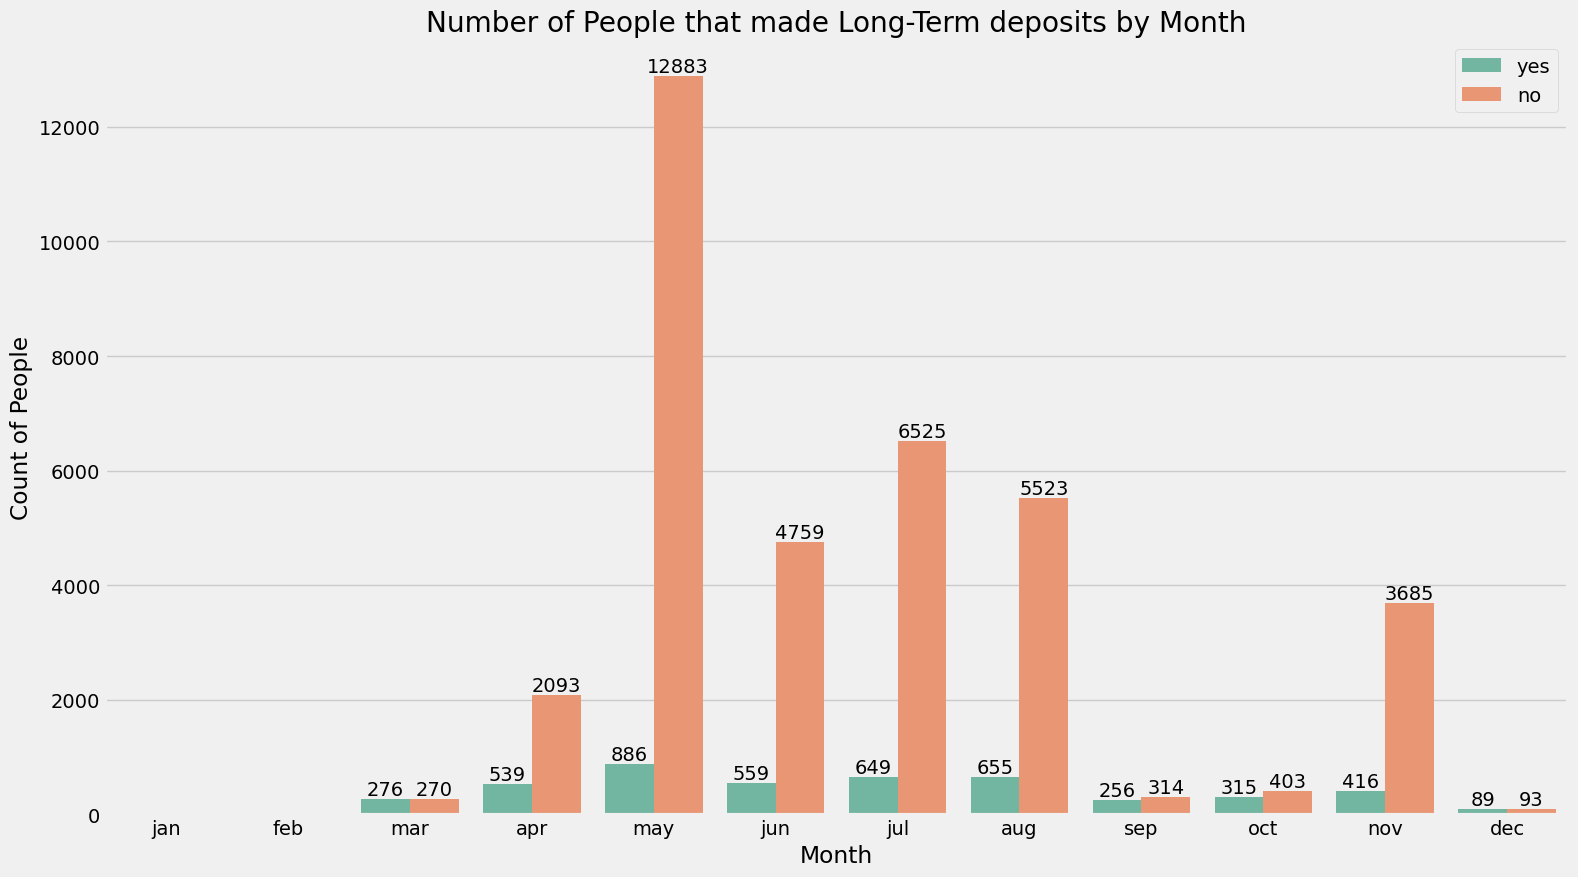

In [71]:
# 3. Countplot for Month property (ordered Jan-Dec)

fig, ax = plt.subplots(figsize=(16,9))
sns.countplot(
    data=bankDF,
    x="month",
    hue="y",
    ax=ax,
    hue_order=["yes", "no"],
    order=month_order
)
plt.title("Number of People that made Long-Term deposits by Month")
plt.xlabel("Month")
plt.ylabel("Count of People")

for container in ax.containers:
    ax.bar_label(container)

plt.xticks(rotation=0, ha='center', position=(1.2, 0))
plt.tight_layout()
plt.legend()
plt.show()

#### "day_of_week" Property

In [72]:
# 1. Calculate day_percentages DataFrame (ordered Mon-Fri)
day_order = ['mon', 'tue', 'wed', 'thu', 'fri']

day_counts = bankDF.groupby(['day_of_week', 'y']).size().unstack(fill_value=0)
day_counts['total'] = day_counts.sum(axis=1)
day_counts['yes_ratio'] = day_counts['yes'] / day_counts['total']
day_counts['no_ratio'] = day_counts['no'] / day_counts['total']

# Convert to percentages and round
day_percentages = day_counts[['yes_ratio', 'no_ratio']] * 100
day_percentages = day_percentages.round(2)
day_percentages["total"] = day_counts["total"]

# Reset index so 'day_of_week' becomes a column
day_percentages = day_percentages.reset_index()

# Rename columns for clarity
day_percentages = day_percentages.rename(
    columns={
        'day_of_week': 'Day of Week',
        'yes_ratio': 'Yes (%)',
        'no_ratio': 'No (%)',
        'total': 'Total People'
    }
)

# Sort by day order
day_percentages['Day of Week'] = pd.Categorical(day_percentages['Day of Week'], categories=day_order, ordered=True)
day_percentages.sort_values(by="Day of Week", inplace=True)

print("Percentage of People that made Long-Term Deposits by Day of Week")
display(day_percentages)

Percentage of People that made Long-Term Deposits by Day of Week


y,Day of Week,Yes (%),No (%),Total People
1,mon,9.95,90.05,8514
3,tue,11.78,88.22,8090
4,wed,11.67,88.33,8134
2,thu,12.12,87.88,8623
0,fri,10.81,89.19,7827


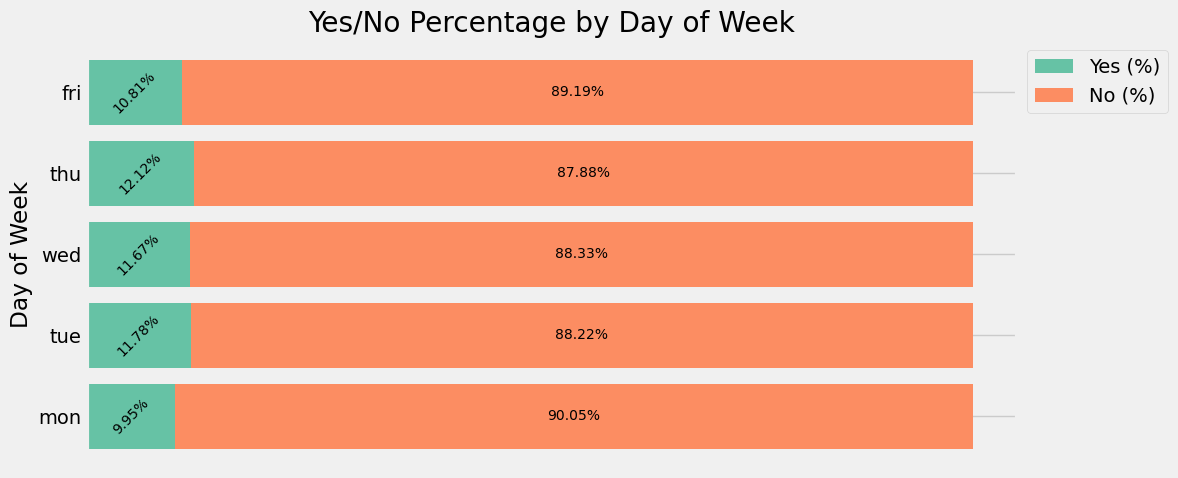

In [73]:
# 2. Horizontal stacked bar plot for Day of Week property
plt.figure(figsize=(12,5))

bars_yes = plt.barh(day_percentages["Day of Week"], day_percentages["Yes (%)"], label="Yes (%)")
bars_no = plt.barh(day_percentages["Day of Week"], day_percentages["No (%)"],
                   left=day_percentages["Yes (%)"], label="No (%)")

for bar in bars_yes:
    width = bar.get_width()
    if width > 0: 
        plt.text(
            width/2,
            bar.get_y() + bar.get_height()/2,
            f"{width:.2f}%",
            ha='center', va='center', rotation=45,
            color='black', fontsize=10
        )

for bar, yes_width in zip(bars_no, day_percentages["Yes (%)"]):
    width = bar.get_width()
    if width > 0: 
        plt.text(
            yes_width + width/2,
            bar.get_y() + bar.get_height()/2,
            f"{width:.2f}%",
            ha='center', va='center',
            color='black', fontsize=10
        )

plt.ylabel("Day of Week")
plt.title("Yes/No Percentage by Day of Week")
plt.xticks([])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

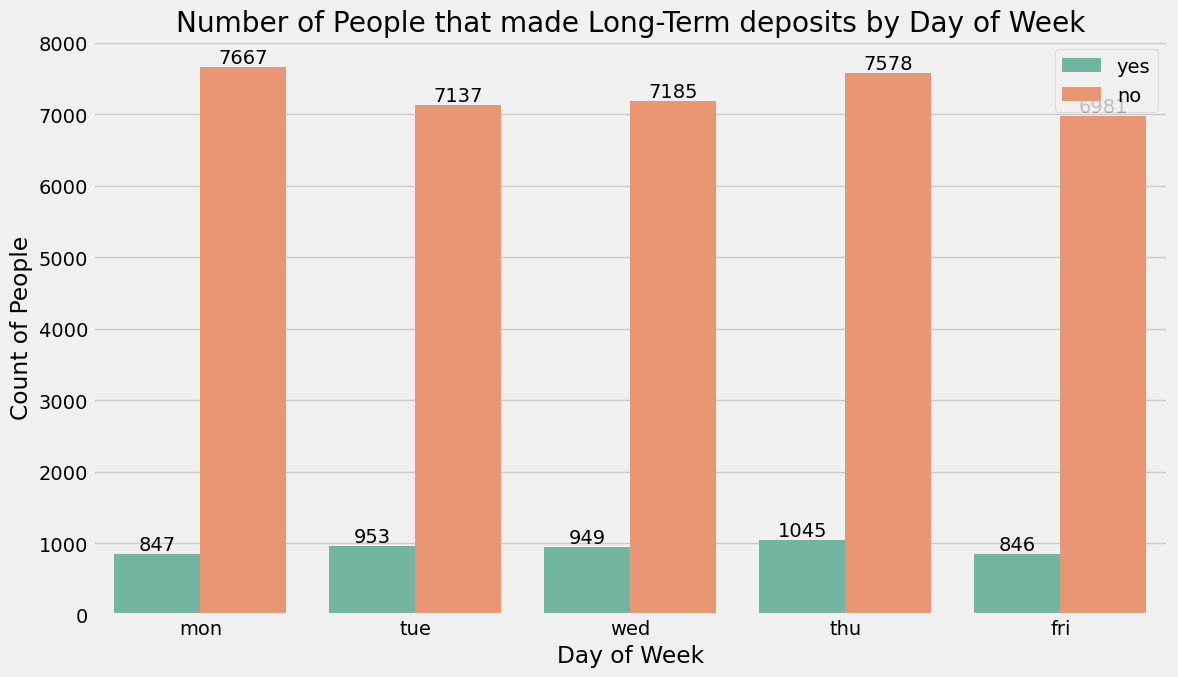

In [74]:
# 3. Countplot for Day of Week property (ordered Mon-Fri)
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(
    data=bankDF,
    x="day_of_week",
    hue="y",
    ax=ax,
    hue_order=["yes", "no"],
    order=day_order
)
plt.title("Number of People that made Long-Term deposits by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Count of People")

for container in ax.containers:
    ax.bar_label(container)

plt.xticks(rotation=0, ha='center', position=(1.2, 0))
plt.tight_layout()
plt.legend()
plt.show()

#### "p_outcome" Property

In [75]:
# 1. Calculate poutcome_percentages DataFrame
poutcome_counts = bankDF.groupby(['poutcome', 'y']).size().unstack(fill_value=0)
poutcome_counts['total'] = poutcome_counts.sum(axis=1)
poutcome_counts['yes_ratio'] = poutcome_counts['yes'] / poutcome_counts['total']
poutcome_counts['no_ratio'] = poutcome_counts['no'] / poutcome_counts['total']

# Convert to percentages and round
poutcome_percentages = poutcome_counts[['yes_ratio', 'no_ratio']] * 100
poutcome_percentages = poutcome_percentages.round(2)
poutcome_percentages["total"] = poutcome_counts["total"]

# Reset index so 'poutcome' becomes a column
poutcome_percentages = poutcome_percentages.reset_index()

# Rename columns for clarity
poutcome_percentages = poutcome_percentages.rename(
    columns={
        'poutcome': 'Previous Outcome',
        'yes_ratio': 'Yes (%)',
        'no_ratio': 'No (%)',
        'total': 'Total People'
    }
)

poutcome_percentages.sort_values(by="Previous Outcome", inplace=True)
print("Percentage of People that made Long-Term Deposits by Previous Outcome")
display(poutcome_percentages)

Percentage of People that made Long-Term Deposits by Previous Outcome


y,Previous Outcome,Yes (%),No (%),Total People
0,failure,14.23,85.77,4252
1,nonexistent,8.83,91.17,35563
2,success,65.11,34.89,1373


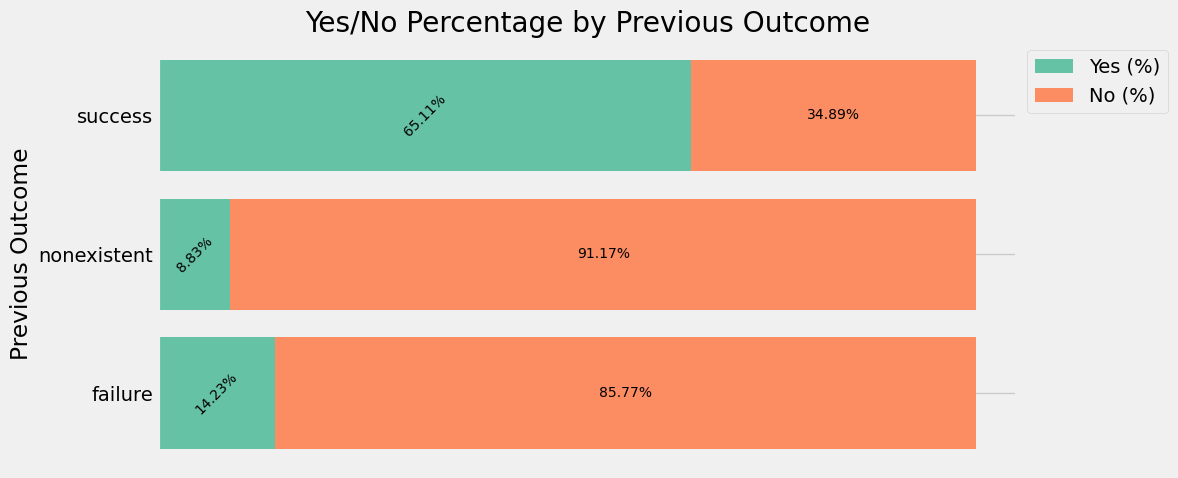

In [76]:
# 2. Horizontal stacked bar plot for Previous Outcome property
plt.figure(figsize=(12,5))

bars_yes = plt.barh(poutcome_percentages["Previous Outcome"], poutcome_percentages["Yes (%)"], label="Yes (%)")
bars_no = plt.barh(poutcome_percentages["Previous Outcome"], poutcome_percentages["No (%)"],
                   left=poutcome_percentages["Yes (%)"], label="No (%)")

for bar in bars_yes:
    width = bar.get_width()
    if width > 0: 
        plt.text(
            width/2,
            bar.get_y() + bar.get_height()/2,
            f"{width:.2f}%",
            ha='center', va='center', rotation=45,
            color='black', fontsize=10
        )

for bar, yes_width in zip(bars_no, poutcome_percentages["Yes (%)"]):
    width = bar.get_width()
    if width > 0: 
        plt.text(
            yes_width + width/2,
            bar.get_y() + bar.get_height()/2,
            f"{width:.2f}%",
            ha='center', va='center',
            color='black', fontsize=10
        )

plt.ylabel("Previous Outcome")
plt.title("Yes/No Percentage by Previous Outcome")
plt.xticks([])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

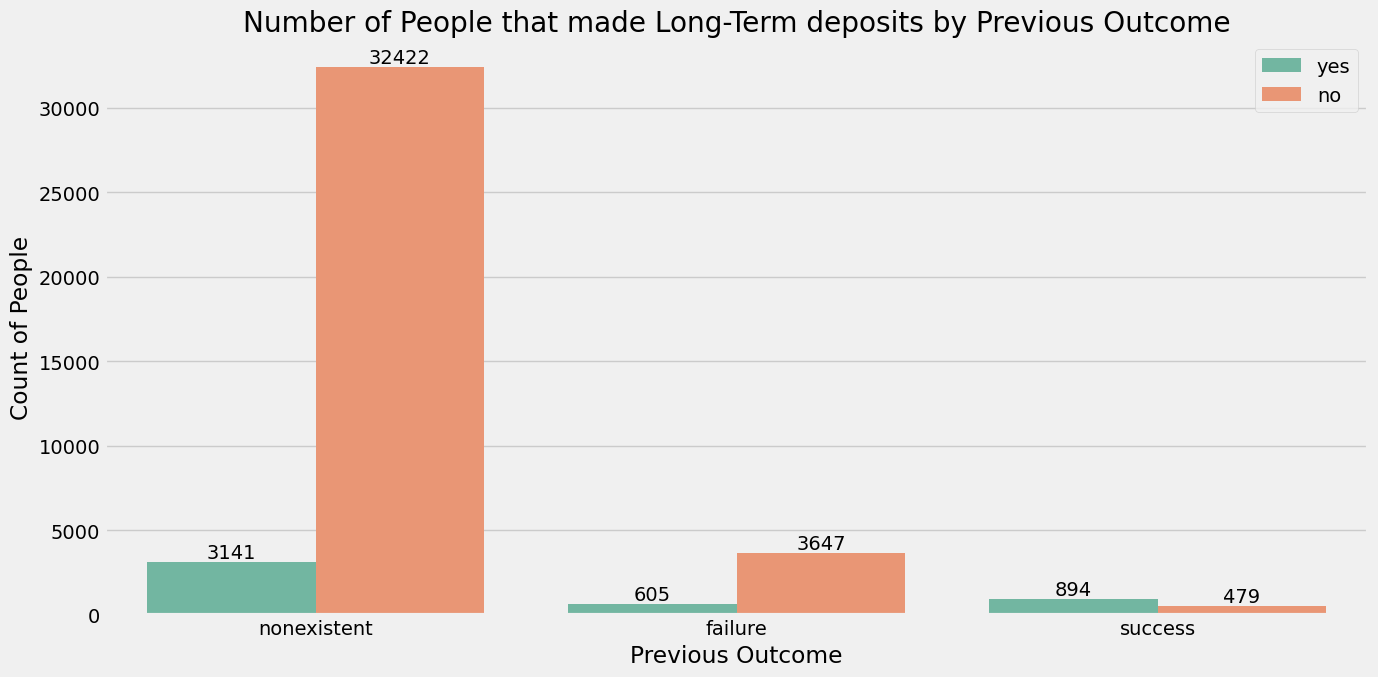

In [77]:
# 3. Countplot for Previous Outcome property
fig, ax = plt.subplots(figsize=(14,7))
sns.countplot(
    data=bankDF,
    x="poutcome",
    hue="y",
    ax=ax,
    hue_order=["yes", "no"]
)
plt.title("Number of People that made Long-Term deposits by Previous Outcome")
plt.xlabel("Previous Outcome")
plt.ylabel("Count of People")

for container in ax.containers:
    ax.bar_label(container)

plt.xticks(rotation=0, ha='center', position=(1.2, 0))
plt.tight_layout()
plt.legend()
plt.show()

### Numerical Values

'age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'

#### Important functions for numerical properties

##### Get the outliers (as data frame)

In [78]:
# Function to get outliers (returns a DataFrame of outlier rows for each group)
def get_outliers(df, group_col, value_col):
    """
    Returns a DataFrame with outliers for value_col, grouped by group_col.
    Outliers are defined as values outside [Q1 - 1.5*IQR, Q3 + 1.5*IQR] for each group.
    """
    outlier_rows = []
    for name, group in df.groupby(group_col):
        Q1 = group[value_col].quantile(0.25)
        Q3 = group[value_col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outlier_rows.append(group[(group[value_col] < lower) | (group[value_col] > upper)])
    return pd.concat(outlier_rows, axis=0)

In [79]:
def anova_results(df, target='y'):
    """Run ANOVA for all numeric columns against target, return results as DataFrame."""
    numeric_cols = df.select_dtypes(include='number').columns
    results = []
    for col in numeric_cols:
        groups = [df[df[target] == val][col].dropna() for val in df[target].unique()]
        if all(len(g) > 1 for g in groups):
            stat, p = sp.stats.f_oneway(*groups)
            results.append({'feature': col, 'F_statistic': stat, 'p_value': p})
    return pd.DataFrame(results).sort_values('p_value')

#### Correlation between numeric variables ####

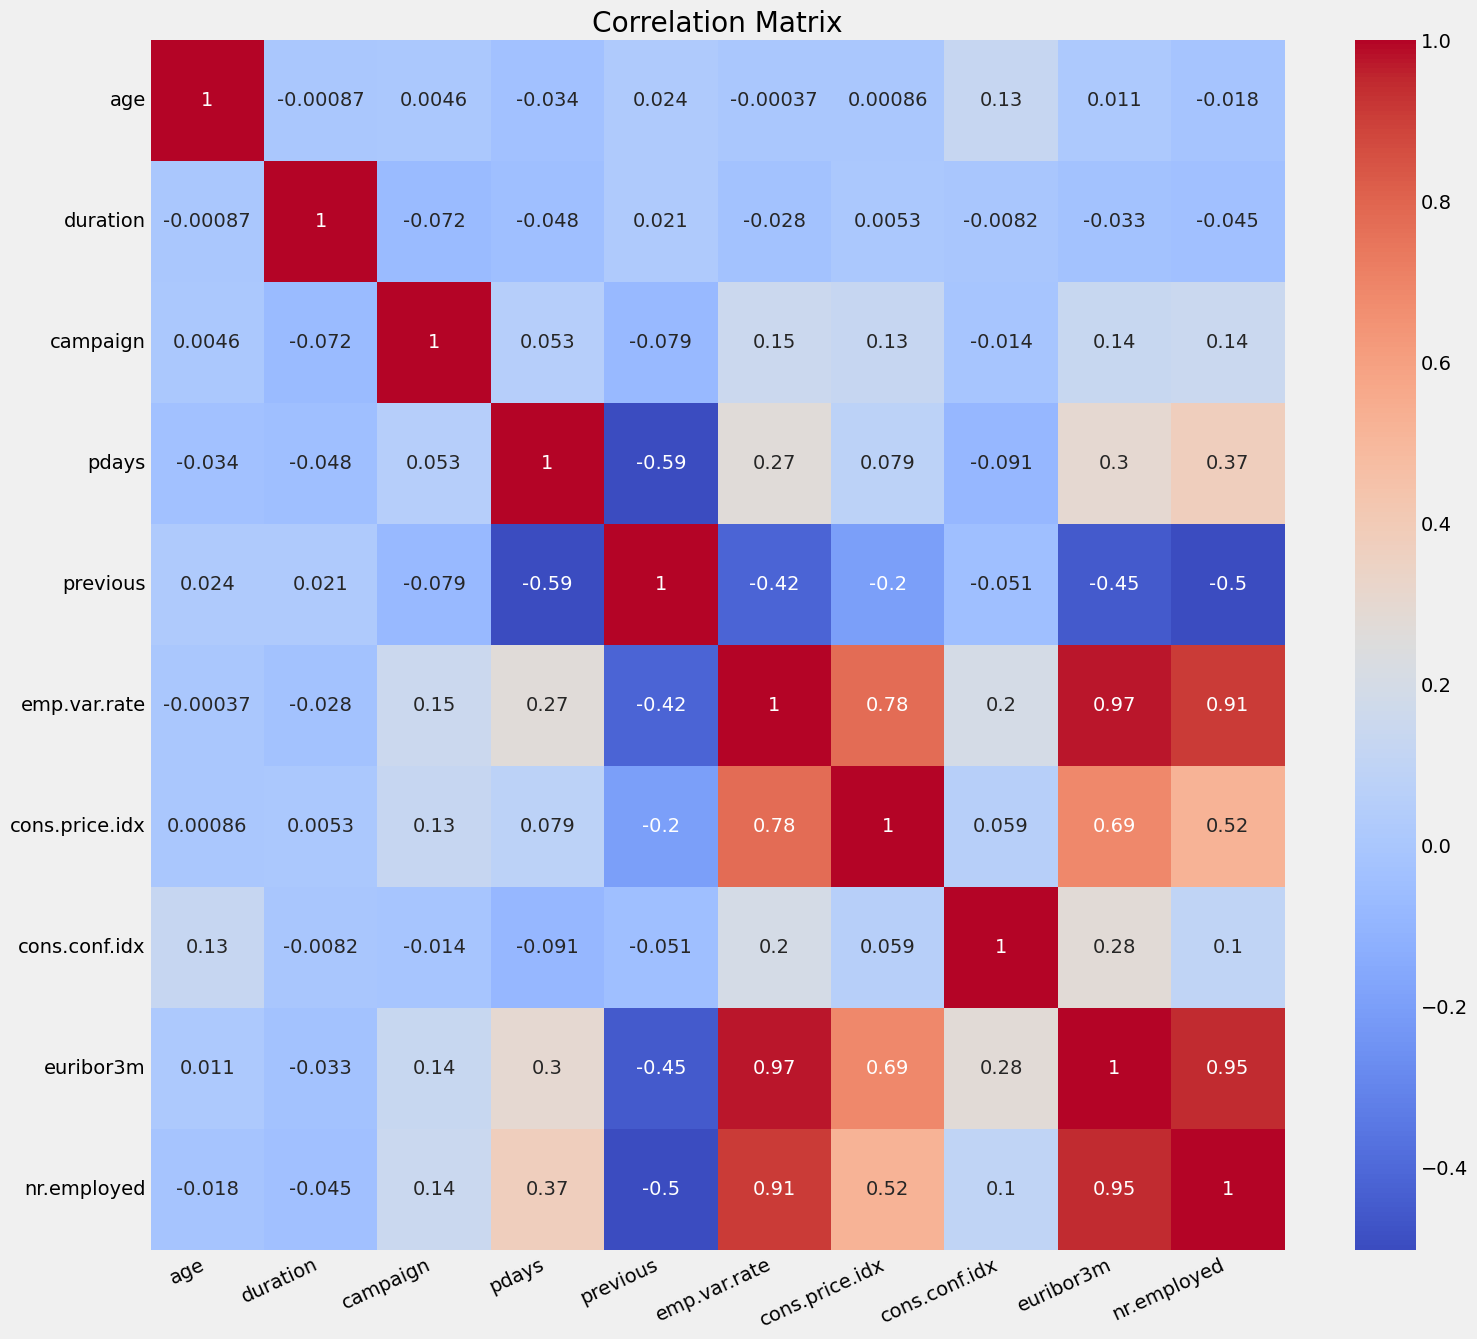

In [80]:
# Correlation matrix
corr = bankDF.select_dtypes(exclude='object').corr()
plt.figure(figsize=(16,14))
sns.heatmap(corr, annot=True, cmap='coolwarm', robust=True)
plt.tight_layout()
plt.xticks(rotation=25, ha='right')
plt.title('Correlation Matrix')
plt.show()

#### Correlation between the properties and the y value 

In [81]:
#Calculate ANOVA results using PreppedDF
anova_df = anova_results(PreppedDF, target='y')
display(anova_df)

,feature,F_statistic,p_value
1,duration,8096.674733,0.000000e+00
3,pdays,4855.860788,0.000000e+00
5,emp.var.rate,4016.897675,0.000000e+00
4,previous,2304.240069,0.000000e+00
9,nr.employed,5922.290483,0.000000e+00
8,euribor3m,4303.861643,0.000000e+00
6,cons.price.idx,774.562345,6.753196e-169
2,campaign,181.993792,2.178508e-41
7,cons.conf.idx,123.845148,1.001034e-28
0,age,37.589167,8.811995e-10


**First 8 properties highly relate to the target property - y**

The feature is both strongly different between groups (F_statistic) and statistically significant to the outcome(p_value).

#### "Age" - Property

count    41170.000000
mean        40.020355
std         10.419647
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64


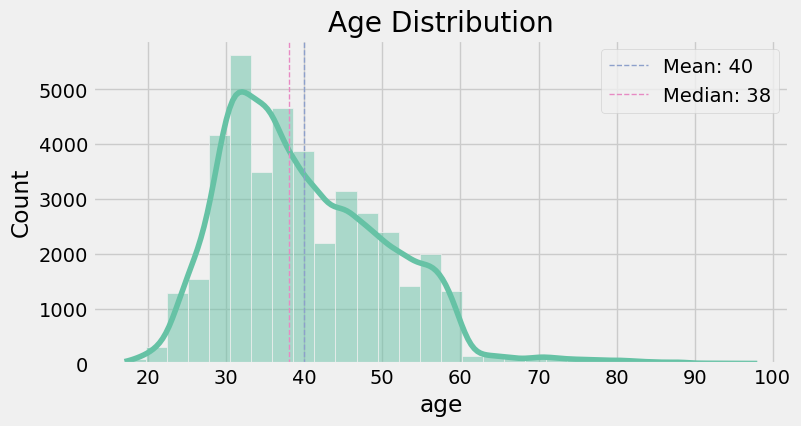

In [82]:
# Summary statistics
print(PreppedDF['age'].describe())

# Histogram
plt.figure(figsize=(8,4))
sns.histplot(PreppedDF['age'], bins=30, kde=True)
plt.axvline(PreppedDF['age'].mean(), 
            color=plt.rcParams['axes.prop_cycle'].by_key()['color'][2],
            linestyle='--',
            label=f'Mean: {PreppedDF["age"].mean():.0f}',
            linewidth=1
            )
plt.axvline(PreppedDF['age'].median(), 
            color=plt.rcParams['axes.prop_cycle'].by_key()['color'][3],
            linestyle='--',
            label=f'Median: {PreppedDF["age"].median():.0f}',
            linewidth=1
            )
plt.legend()
plt.title('Age Distribution')
plt.show()

# Outlier detection (IQR)
Q1 = PreppedDF['age'].quantile(0.25)
Q3 = PreppedDF['age'].quantile(0.75)
IQR = Q3 - Q1
outliers = PreppedDF[(PreppedDF['age'] < Q1 - 1.5*IQR) | (PreppedDF['age'] > Q3 + 1.5*IQR)]

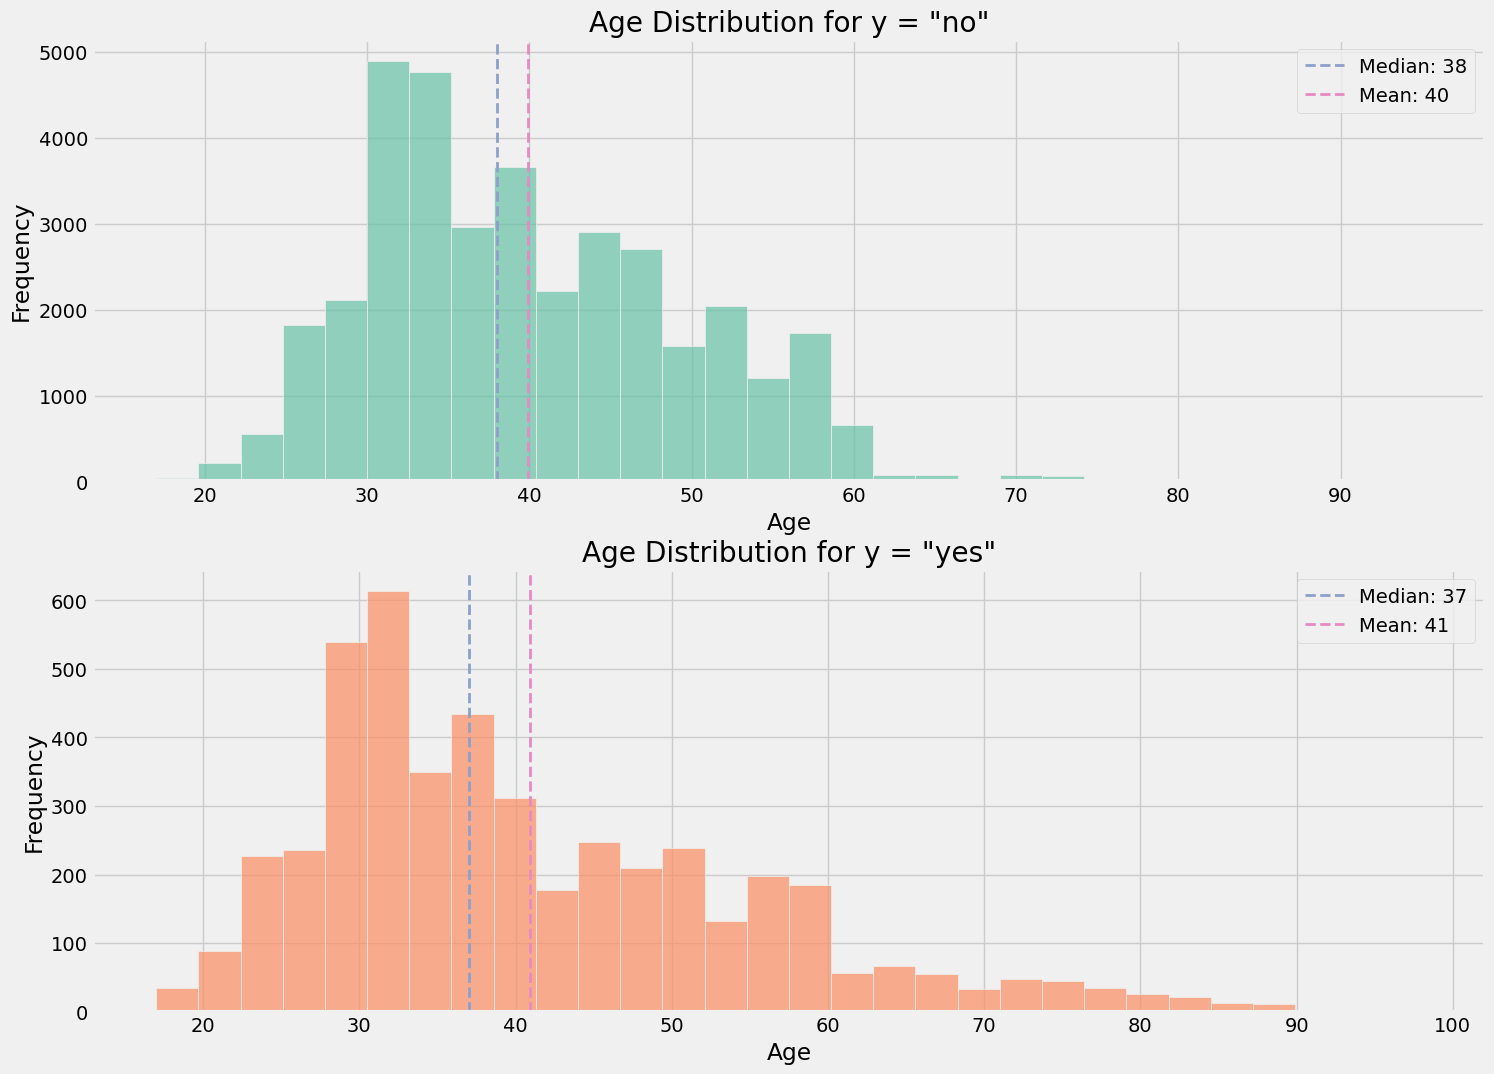

In [83]:
# Create subplots: 2 rows, 1 column
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Histogram for 'no' outcome
sns.histplot(
    data=PreppedDF[PreppedDF['y'] == 'no'],
    x='age',
    bins=30,
    alpha=0.7,
    ax=axes[0]
)
axes[0].set_title('Age Distribution for y = "no"')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].axvline(
    PreppedDF[PreppedDF['y'] == 'no']['age'].median(),
    color=plt.rcParams['axes.prop_cycle'].by_key()['color'][2],
    linestyle='--',
    linewidth=2,
    label=f'Median: {PreppedDF[PreppedDF["y"] == "no"]["age"].median():.0f}'
)
axes[0].axvline(
    PreppedDF[PreppedDF['y'] == 'no']['age'].mean(),
    color=plt.rcParams['axes.prop_cycle'].by_key()['color'][3],
    linestyle='--',
    linewidth=2,
    label=f'Mean: {PreppedDF[PreppedDF["y"] == "no"]["age"].mean():.0f}'
)
axes[0].legend()

# Histogram for 'yes' outcome
sns.histplot(
    data=PreppedDF[PreppedDF['y'] == 'yes'],
    x='age',
    bins=30,
    alpha=0.7,
    ax=axes[1],
    color=plt.rcParams['axes.prop_cycle'].by_key()['color'][1]
)
axes[1].set_title('Age Distribution for y = "yes"')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')
axes[1].axvline(
    PreppedDF[PreppedDF['y'] == 'yes']['age'].median(),
    color=plt.rcParams['axes.prop_cycle'].by_key()['color'][2],
    linestyle='--',
    linewidth=2,
    label=f'Median: {PreppedDF[PreppedDF["y"] == "yes"]["age"].median():.0f}'
)
axes[1].axvline(
    PreppedDF[PreppedDF['y'] == 'yes']['age'].mean(),
    color=plt.rcParams['axes.prop_cycle'].by_key()['color'][3],
    linestyle='--',
    linewidth=2,
    label=f'Mean: {PreppedDF[PreppedDF["y"] == "yes"]["age"].mean():.0f}'
)
axes[1].legend()

plt.show()

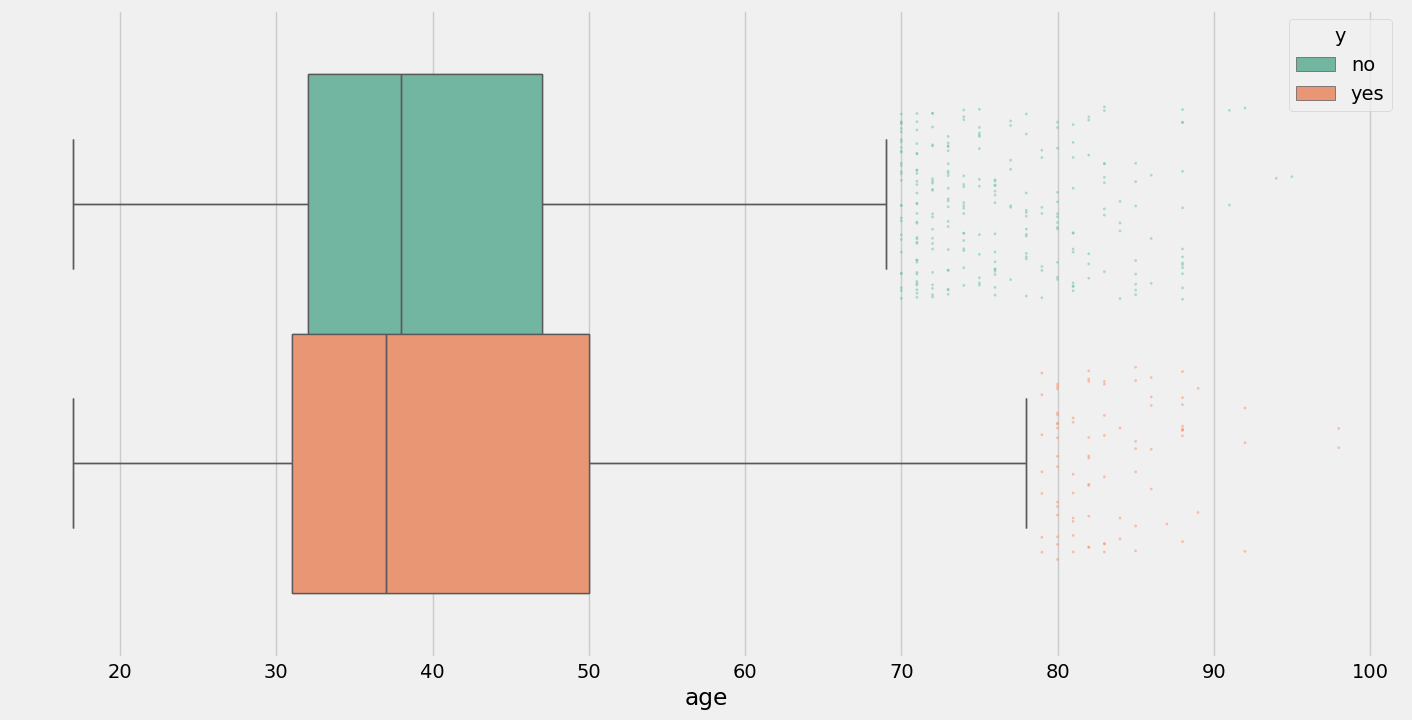

In [84]:
fig, ax = plt.subplots(figsize=(16, 8))

# Boxplot
sns.boxplot(data=PreppedDF, hue='y', x='age', ax=ax, fliersize=0)  # fliersize=0 hides outliers

# Boxplot (without default fliers)
sns.boxplot(data=PreppedDF, hue='y', x='age', ax=ax, fliersize=0)

# Filter only outliers
outlier_df = get_outliers(PreppedDF, 'y', 'age')



# Add jittered points for outliers only
sns.stripplot(
    data=outlier_df,
    hue='y',
    x='age',
    ax=ax,
    dodge=True,
    alpha=0.5,
    jitter=0.3,
    size=2
)

# Optional: remove duplicate legends
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:2], labels[0:2], title='y')

plt.show()


#### "Duration" - (The time spent on each costumer in telemarketing calls)

Duration is an important property to consider for the model. In this dataset if time was spent on the campaign was 0, the y value will always be "no".

So we have to consider that we cannot provide realistic information if there are entries with 0, only entries that are > 0. **Therefore records that contain 0 will be removed.**

We can observe that the longer call durations tend to be associated with a higher conversion rate.

count    41170.000000
mean       258.276925
std        259.262586
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64


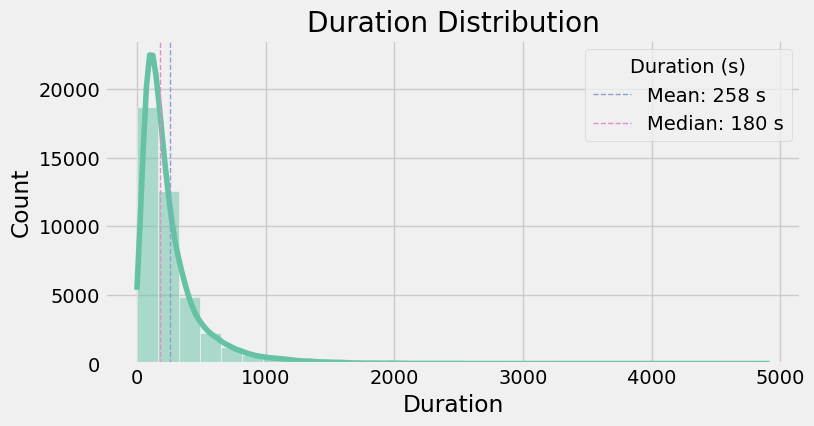

In [85]:
# Summary statistics
print(PreppedDF['duration'].describe())

# Histogram
plt.figure(figsize=(8,4))
sns.histplot(PreppedDF['duration'], bins=30, kde=True)
plt.axvline(PreppedDF['duration'].mean(), 
            color=plt.rcParams['axes.prop_cycle'].by_key()['color'][2],
            linestyle='--',
            label=f'Mean: {PreppedDF["duration"].mean():.0f} s',
            linewidth=1
            )
plt.axvline(PreppedDF['duration'].median(), 
            color=plt.rcParams['axes.prop_cycle'].by_key()['color'][3],
            linestyle='--',
            label=f'Median: {PreppedDF["duration"].median():.0f} s',
            linewidth=1
            )
plt.legend(title='Duration (s)')
plt.title('Duration Distribution')
plt.xlabel('Duration')
plt.show()

# Outlier detection (IQR)
Q1 = PreppedDF['duration'].quantile(0.25)
Q3 = PreppedDF['duration'].quantile(0.75)
IQR = Q3 - Q1
outliers = PreppedDF[(PreppedDF['duration'] < Q1 - 1.5*IQR) | (PreppedDF['duration'] > Q3 + 1.5*IQR)]

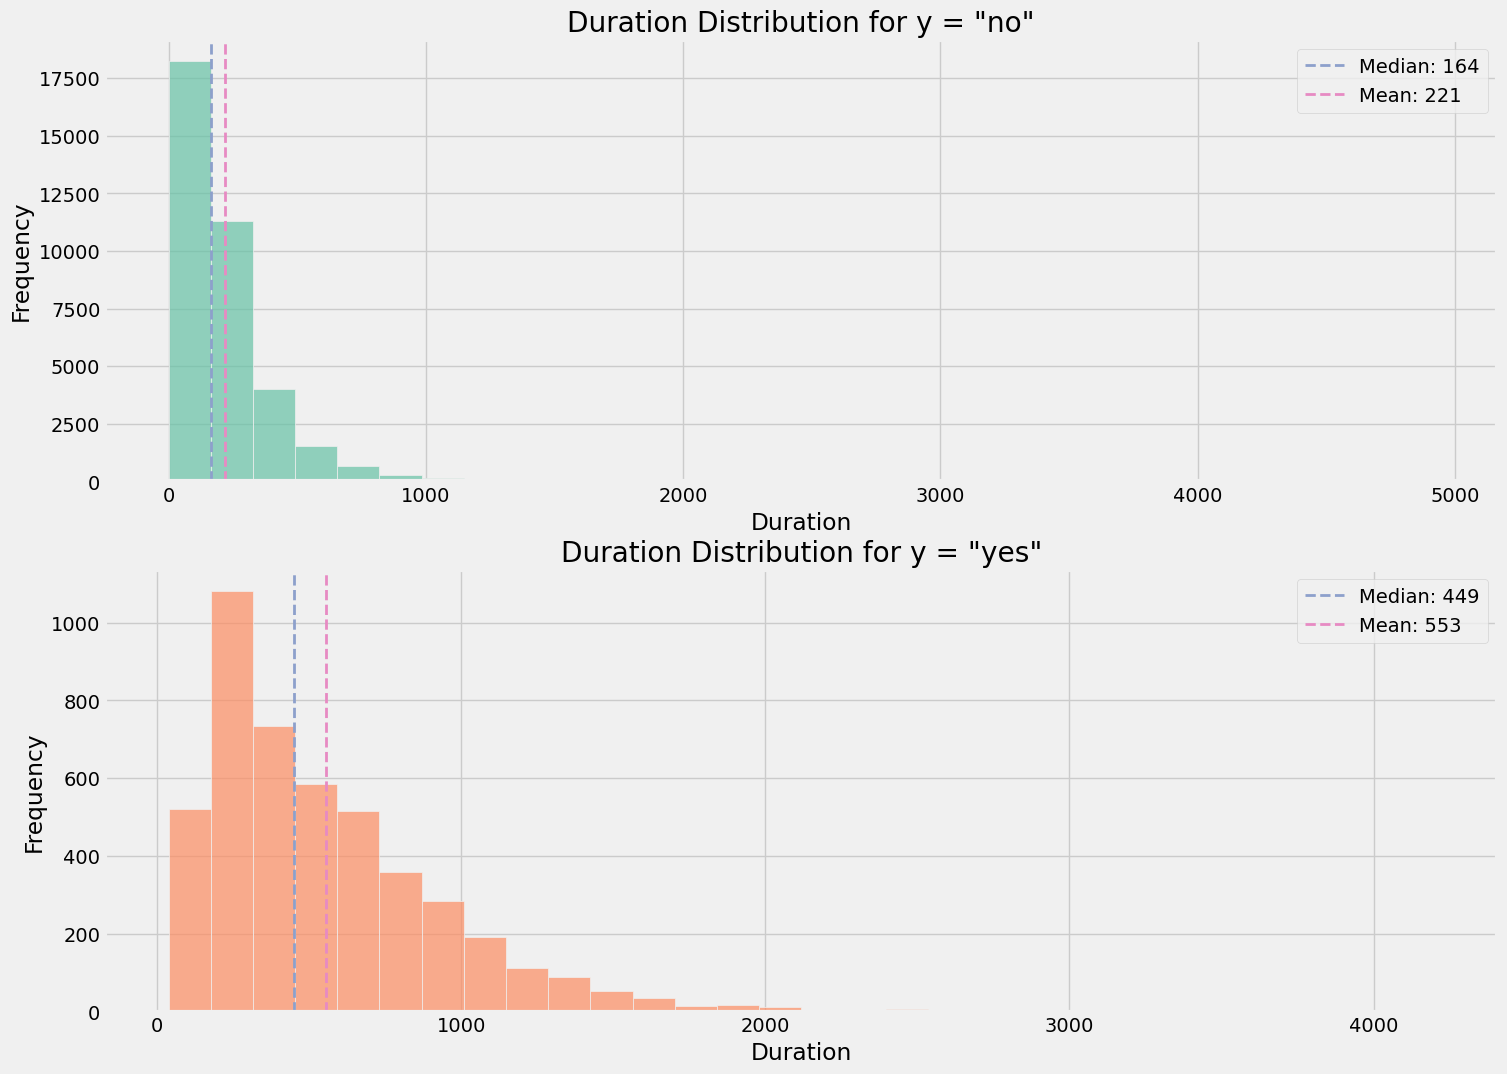

In [86]:
# Create subplots: 2 rows, 1 column
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Histogram for 'no' outcome
sns.histplot(
    data=PreppedDF[PreppedDF['y'] == 'no'],
    x='duration',
    bins=30,
    alpha=0.7,
    ax=axes[0]
)
axes[0].set_title('Duration Distribution for y = "no"')
axes[0].set_xlabel('Duration')
axes[0].set_ylabel('Frequency')
axes[0].axvline(
    PreppedDF[PreppedDF['y'] == 'no']['duration'].median(),
    color=plt.rcParams['axes.prop_cycle'].by_key()['color'][2],
    linestyle='--',
    linewidth=2,
    label=f'Median: {PreppedDF[PreppedDF["y"] == "no"]["duration"].median():.0f}'
)
axes[0].axvline(
    PreppedDF[PreppedDF['y'] == 'no']['duration'].mean(),
    color=plt.rcParams['axes.prop_cycle'].by_key()['color'][3],
    linestyle='--',
    linewidth=2,
    label=f'Mean: {PreppedDF[PreppedDF["y"] == "no"]["duration"].mean():.0f}'
)
axes[0].legend()

# Histogram for 'yes' outcome
sns.histplot(
    data=PreppedDF[PreppedDF['y'] == 'yes'],
    x='duration',
    bins=30,
    alpha=0.7,
    ax=axes[1],
    color=plt.rcParams['axes.prop_cycle'].by_key()['color'][1]
)
axes[1].set_title('Duration Distribution for y = "yes"')
axes[1].set_xlabel('Duration')
axes[1].set_ylabel('Frequency')
axes[1].axvline(
    PreppedDF[PreppedDF['y'] == 'yes']['duration'].median(),
    color=plt.rcParams['axes.prop_cycle'].by_key()['color'][2],
    linestyle='--',
    linewidth=2,
    label=f'Median: {PreppedDF[PreppedDF["y"] == "yes"]["duration"].median():.0f}'
)
axes[1].axvline(
    PreppedDF[PreppedDF['y'] == 'yes']['duration'].mean(),
    color=plt.rcParams['axes.prop_cycle'].by_key()['color'][3],
    linestyle='--',
    linewidth=2,
    label=f'Mean: {PreppedDF[PreppedDF["y"] == "yes"]["duration"].mean():.0f}'
)
axes[1].legend()

plt.show()

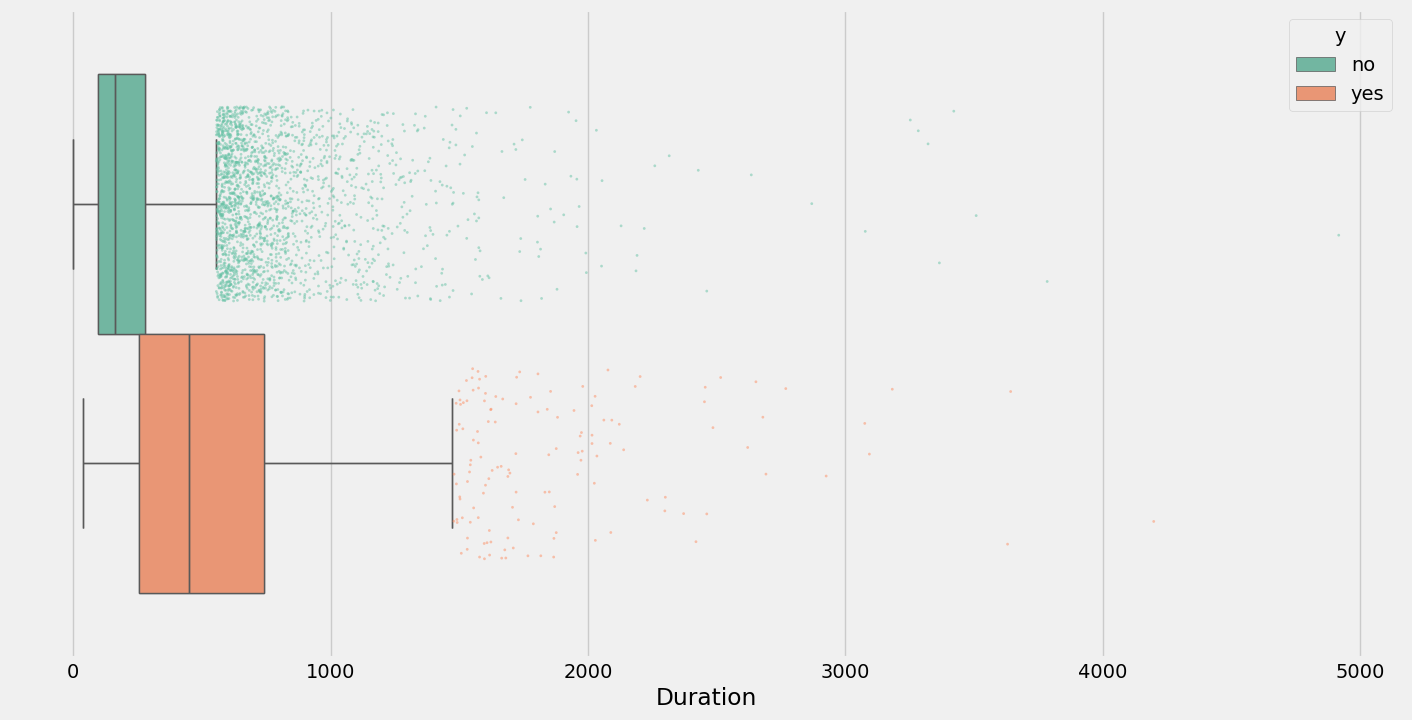

In [87]:
fig, ax = plt.subplots(figsize=(16, 8))

# Boxplot
sns.boxplot(data=PreppedDF, hue='y', x='duration', ax=ax, fliersize=0)  # fliersize=0 hides outliers

# Boxplot (without default fliers)
sns.boxplot(data=PreppedDF, hue='y', x='duration', ax=ax, fliersize=0)

# Filter only outliers
outlier_df = get_outliers(PreppedDF, 'y', 'duration')



# Add jittered points for outliers only
sns.stripplot(
    data=outlier_df,
    hue='y',
    x='duration',
    ax=ax,
    dodge=True,
    alpha=0.5,
    jitter=0.3,
    size=2
)

# Optional: remove duplicate legends
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:2], labels[0:2], title='y')
plt.xlabel('Duration')
plt.show()

In [88]:
print(f"On average, the costumers that are converted spent {(PreppedDF[PreppedDF["y"] == "yes"]["duration"].median() / PreppedDF[PreppedDF["y"] == "no"]["duration"].median()):.1f}x more time a telemarketing convesation")

On average, the costumers that are converted spent 2.7x more time a telemarketing convesation


#### "Campaign" Property

The campaign property represents the number of contacts performed during this campaign for each client. This metric helps understand how many attempts were needed to reach a successful conversion or determine an unsuccessful one.

count    41170.000000
mean         2.567719
std          2.770421
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64


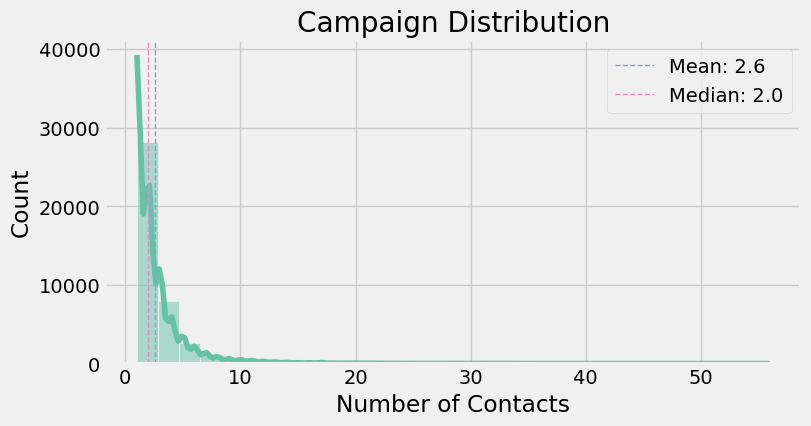

In [90]:
# Summary statistics and general distribution
print(PreppedDF['campaign'].describe())

# Histogram with mean and median
plt.figure(figsize=(8,4))
sns.histplot(PreppedDF['campaign'], bins=30, kde=True)
plt.axvline(PreppedDF['campaign'].mean(), 
            color=plt.rcParams['axes.prop_cycle'].by_key()['color'][2],
            linestyle='--',
            label=f'Mean: {PreppedDF["campaign"].mean():.1f}',
            linewidth=1
            )
plt.axvline(PreppedDF['campaign'].median(), 
            color=plt.rcParams['axes.prop_cycle'].by_key()['color'][3],
            linestyle='--',
            label=f'Median: {PreppedDF["campaign"].median():.1f}',
            linewidth=1
            )
plt.legend()
plt.title('Campaign Distribution')
plt.xlabel('Number of Contacts')
plt.show()

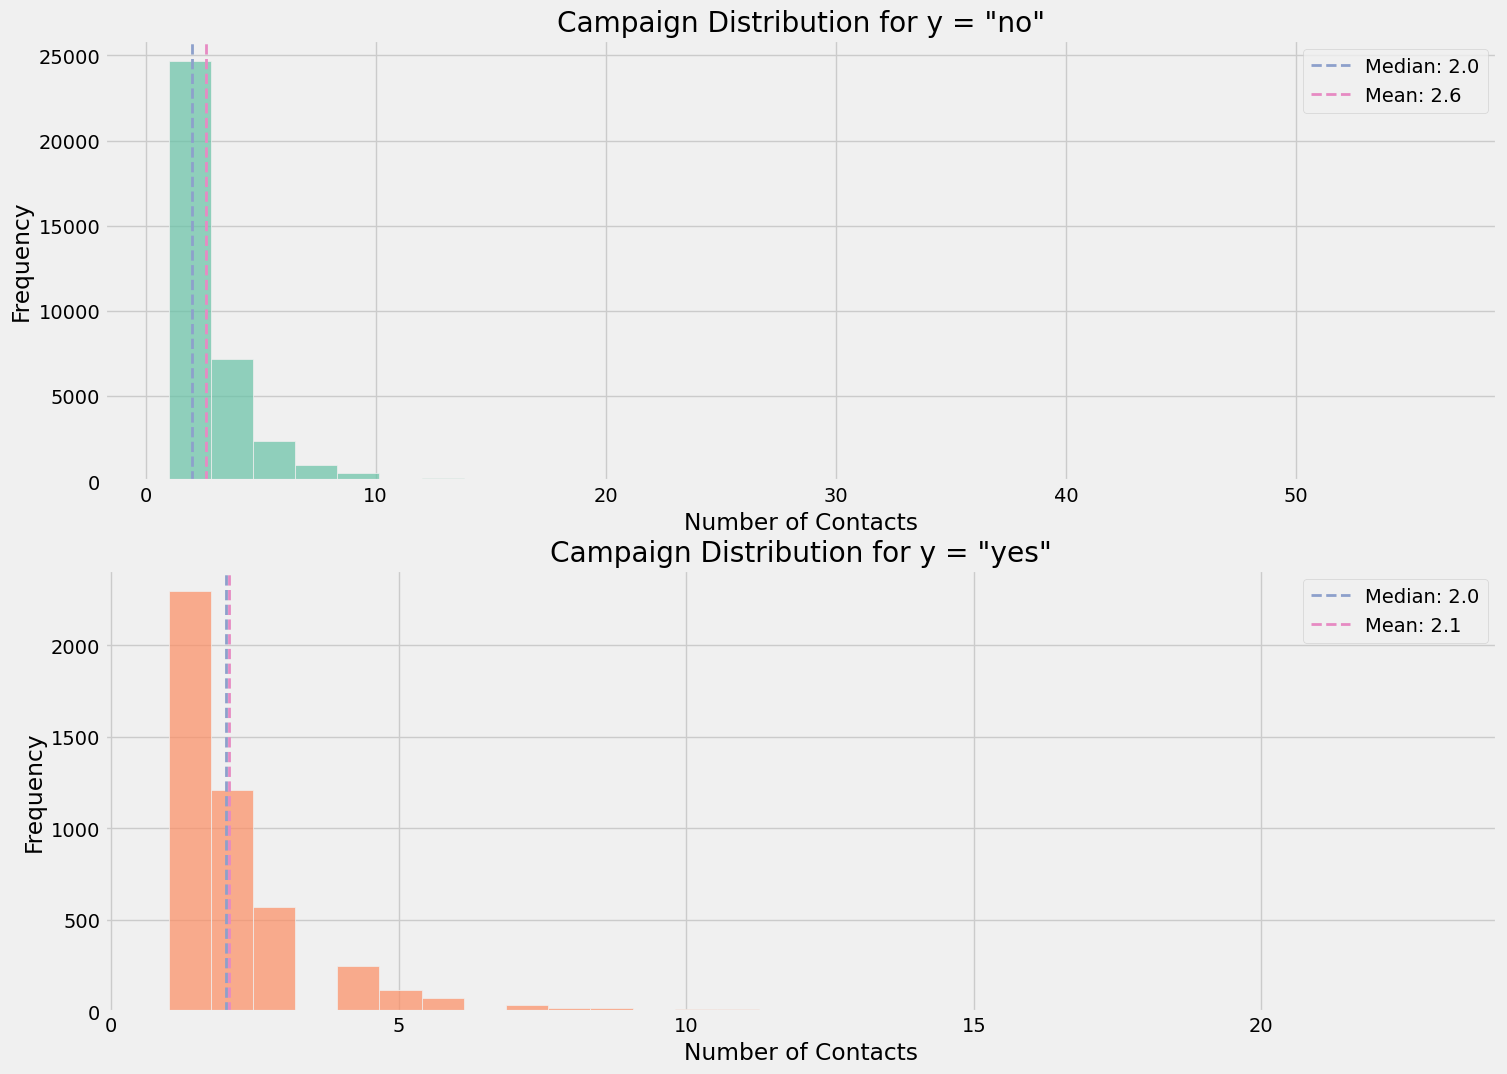

In [94]:
# Separate distributions by outcome
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Histogram for 'no' outcome
sns.histplot(
    data=PreppedDF[PreppedDF['y'] == 'no'],
    x='campaign',
    bins=30,
    alpha=0.7,
    ax=axes[0]
)
axes[0].set_title('Campaign Distribution for y = "no"')
axes[0].set_xlabel('Number of Contacts')
axes[0].set_ylabel('Frequency')
axes[0].axvline(
    PreppedDF[PreppedDF['y'] == 'no']['campaign'].median(),
    color=plt.rcParams['axes.prop_cycle'].by_key()['color'][2],
    linestyle='--',
    linewidth=2,
    label=f'Median: {PreppedDF[PreppedDF["y"] == "no"]["campaign"].median():.1f}'
)
axes[0].axvline(
    PreppedDF[PreppedDF['y'] == 'no']['campaign'].mean(),
    color=plt.rcParams['axes.prop_cycle'].by_key()['color'][3],
    linestyle='--',
    linewidth=2,
    label=f'Mean: {PreppedDF[PreppedDF["y"] == "no"]["campaign"].mean():.1f}'
)
axes[0].legend()

# Histogram for 'yes' outcome
sns.histplot(
    data=PreppedDF[PreppedDF['y'] == 'yes'],
    x='campaign',
    bins=30,
    alpha=0.7,
    ax=axes[1],
    color=plt.rcParams['axes.prop_cycle'].by_key()['color'][1]
)
axes[1].set_title('Campaign Distribution for y = "yes"')
axes[1].set_xlabel('Number of Contacts')
axes[1].set_ylabel('Frequency')
axes[1].axvline(
    PreppedDF[PreppedDF['y'] == 'yes']['campaign'].median(),
    color=plt.rcParams['axes.prop_cycle'].by_key()['color'][2],
    linestyle='--',
    linewidth=2,
    label=f'Median: {PreppedDF[PreppedDF["y"] == "yes"]["campaign"].median():.1f}'
)
axes[1].axvline(
    PreppedDF[PreppedDF['y'] == 'yes']['campaign'].mean(),
    color=plt.rcParams['axes.prop_cycle'].by_key()['color'][3],
    linestyle='--',
    linewidth=2,
    label=f'Mean: {PreppedDF[PreppedDF["y"] == "yes"]["campaign"].mean():.1f}'
)
axes[1].legend()
plt.show()


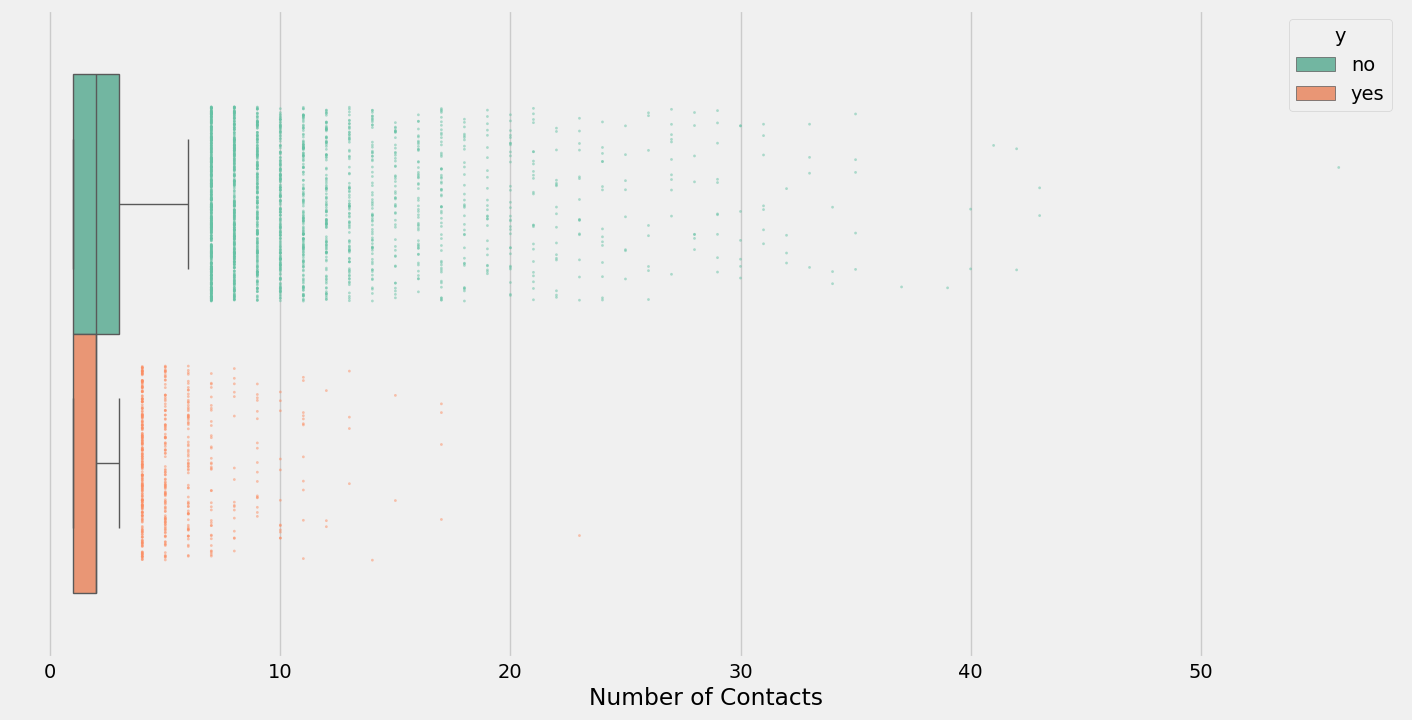

On average, the successful conversions required 1.0x the number of contacts compared to unsuccessful ones


In [91]:
# Boxplot with outliers
fig, ax = plt.subplots(figsize=(16, 8))

# Boxplot (without default fliers)
sns.boxplot(data=PreppedDF, hue='y', x='campaign', ax=ax, fliersize=0)

# Filter only outliers
outlier_df = get_outliers(PreppedDF, 'y', 'campaign')

# Add jittered points for outliers only
sns.stripplot(
    data=outlier_df,
    hue='y',
    x='campaign',
    ax=ax,
    dodge=True,
    alpha=0.5,
    jitter=0.3,
    size=2
)

# Optional: remove duplicate legends
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:2], labels[0:2], title='y')
plt.xlabel('Number of Contacts')
plt.show()

# Calculate and print the ratio
print(f"On average, the successful conversions required {(PreppedDF[PreppedDF['y'] == 'yes']['campaign'].median() / PreppedDF[PreppedDF['y'] == 'no']['campaign'].median()):.1f}x the number of contacts compared to unsuccessful ones")

## III. & IV. Data Preparation & Modeling
